In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import sklearn

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv')

In [3]:
df

ID  age         job   marital  education default  balance housing  \
0      26110   56      admin.   married    unknown      no     1933      no   
1      40576   31     unknown   married  secondary      no        3      no   
2      15320   27    services   married  secondary      no      891     yes   
3      43962   57  management  divorced   tertiary      no     3287      no   
4      29842   31  technician   married  secondary      no      119     yes   
...      ...  ...         ...       ...        ...     ...      ...     ...   
31642  36483   29  management    single   tertiary      no        0     yes   
31643  40178   53  management  divorced   tertiary      no      380      no   
31644  19710   32  management    single   tertiary      no      312      no   
31645  38556   57  technician   married  secondary      no      225     yes   
31646  14156   55  management  divorced  secondary      no      204     yes   

      loan    contact  day month  duration  campaign  pdays  previous  \
0       no  telephone   19   nov        44         2     -1         0   
1       no   cellular   20   jul        91         2     -1         0   
2       no   cellular   18   jul       240         1     -1         0   
3       no   cellular   22   jun       867         1     84         3   
4       no   cellular    4   feb       380         1     -1         0   
...    ...        ...  ...   ...       ...       ...    ...       ...   
31642   no   cellular   12   may       116         2     -1         0   
31643  yes   cellular    5   jun       438         2     -1         0   
31644   no   cellular    7   aug        37         3     -1         0   
31645   no  telephone   15   may        22         7    337        12   
31646   no   cellular   11   jul      1973         2     -1         0   

      poutcome subscribed  
0      unknown         no  
1      unknown         no  
2      unknown         no  
3      success        yes  
4      unknown         no  
...        ...        ...  
31642  unknown         no  
31643  unknown        yes  
31644  unknown         no  
31645  failure         no  
31646  unknown        yes  

[31647 rows x 18 columns]

This dataset contains the details of related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal of this dataset is to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not. 
this dataset in which it contains both Numerical and Categorical data are present.Here 'Subscribe' is the Target variable which contains 2 categories so it will be term of 'Classification problem', where we need to predict the subscription using classification models.



EDA(Exploratory Data Analysis)

In [4]:
df.shape

(31647, 18)

This Dataset contains 31647 rows and 18 columns.out of which 1 is target variable and remaining 17 are independent variables.

In [5]:
df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [6]:
df.columns.tolist()

['ID',
 'age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'subscribed']

In [7]:
df.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

check the null values

In [8]:
df.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

As we can see there are no null values present in this dataset.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


<Axes: >

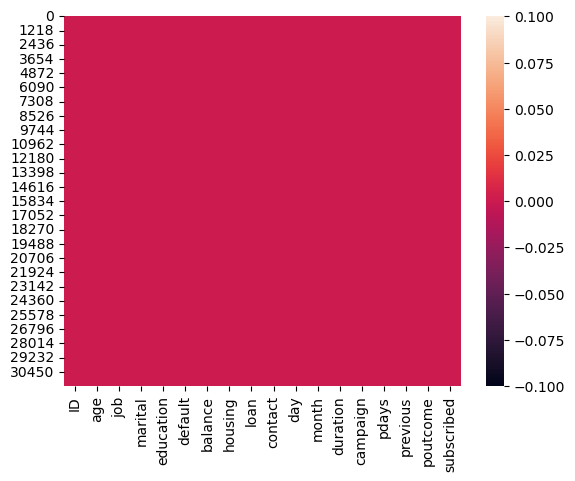

In [10]:
sns.heatmap(df.isnull())

As we can clearly visualize that there is no missing data present in the dataset.

In [11]:
df['subscribed'].unique()

array(['no', 'yes'], dtype=object)

In [12]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

26110    1
13339    1
39681    1
15135    1
26037    1
        ..
1247     1
15584    1
25376    1
38699    1
14156    1
Name: ID, Length: 31647, dtype: int64


32    1457
31    1417
33    1406
34    1321
35    1314
      ... 
92       1
95       1
93       1
94       1
90       1
Name: age, Length: 76, dtype: int64


blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64


married     19095
single       8922
divorced     3630
Name: marital, dtype: int64


secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64


no     31062
yes      585
Name: default, dtype: int64


 0        2470
 1         137
 2         109
 4          95
 3          88
          ... 
 15120       1
-713         1
-905         1
 4722  

In [13]:
df.nunique().to_frame('number of unique values')

number of unique values
ID                            31647
age                              76
job                              12
marital                           3
education                         4
default                           2
balance                        6326
housing                           2
loan                              2
contact                           3
day                              31
month                            12
duration                       1454
campaign                         45
pdays                           509
previous                         38
poutcome                          4
subscribed                        2

Seperating Numerical and Categorical columns

In [14]:
cat=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat.append(i)
print('Catogerical_col:',cat)
print('\n')

Catogerical_col: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'subscribed']




In [15]:
num=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        num.append(i)
print('Numerical_col:',num)
print('\n')

Numerical_col: ['ID', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']




checking the number of unique value in each column.

In [16]:
df.nunique().to_frame('Number of unique values')

Number of unique values
ID                            31647
age                              76
job                              12
marital                           3
education                         4
default                           2
balance                        6326
housing                           2
loan                              2
contact                           3
day                              31
month                            12
duration                       1454
campaign                         45
pdays                           509
previous                         38
poutcome                          4
subscribed                        2

These are the unique values present in the datset here ID column has the dat of maximum unique id to  which can be dropped.

In [17]:
df.drop('ID',axis=1,inplace=True)

In [18]:
df.head()

age         job   marital  education default  balance housing loan  \
0   56      admin.   married    unknown      no     1933      no   no   
1   31     unknown   married  secondary      no        3      no   no   
2   27    services   married  secondary      no      891     yes   no   
3   57  management  divorced   tertiary      no     3287      no   no   
4   31  technician   married  secondary      no      119     yes   no   

     contact  day month  duration  campaign  pdays  previous poutcome  \
0  telephone   19   nov        44         2     -1         0  unknown   
1   cellular   20   jul        91         2     -1         0  unknown   
2   cellular   18   jul       240         1     -1         0  unknown   
3   cellular   22   jun       867         1     84         3  success   
4   cellular    4   feb       380         1     -1         0  unknown   

  subscribed  
0         no  
1         no  
2         no  
3        yes  
4         no

Checking the counts of Targets

In [19]:
df['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

Description of Dataset.
Here it gives Statistical summary of Numerical columns.

In [20]:
df.describe()

age        balance           day      duration      campaign  \
count  31647.000000   31647.000000  31647.000000  31647.000000  31647.000000   
mean      40.957247    1363.890258     15.835466    258.113534      2.765697   
std       10.625134    3028.304293      8.337097    257.118973      3.113830   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      73.000000      8.000000    104.000000      1.000000   
50%       39.000000     450.000000     16.000000    180.000000      2.000000   
75%       48.000000    1431.000000     21.000000    318.500000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  31647.000000  31647.000000  
mean      39.576042      0.574272  
std       99.317592      2.422529  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

This is the Staststical information of the numerical columns.This summary of the dataset looks perfect.since there is no negative /invalid values present.
here mean value is grester than median so right skewness present in the dataset.
and 75% and Max values there is huge difference hence outliers are present in the dataset.

Data Visualization

no     27932
yes     3715
Name: subscribed, dtype: int64


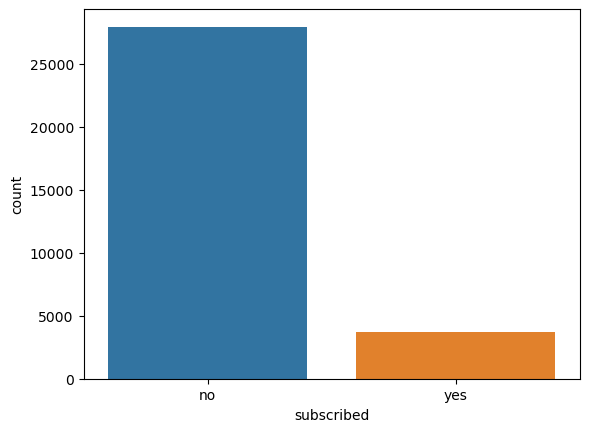

In [21]:
ux=sns.countplot(x='subscribed',data=df)
print(df['subscribed'].value_counts())
plt.show()

Here we can observe that there No subscribed  is more and yes subscribed are less present. so this leads to class imbalance issue in data.so here we are using oversampling method to resolve this problem later part.

32    1457
31    1417
33    1406
34    1321
35    1314
      ... 
92       1
95       1
93       1
94       1
90       1
Name: age, Length: 76, dtype: int64


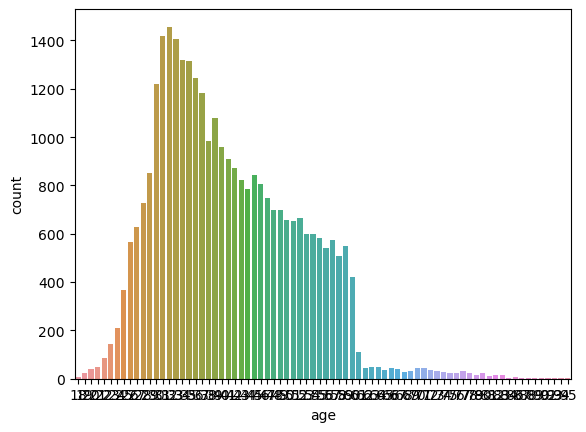

In [22]:
ux=sns.countplot(x='age',data=df)
print(df['age'].value_counts())
plt.show()

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64


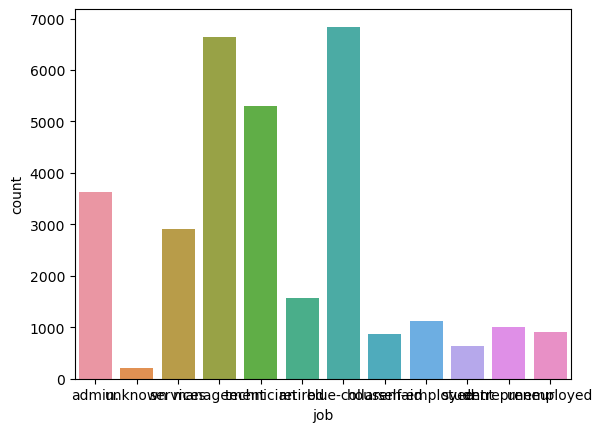

In [23]:
ux=sns.countplot(x='job',data=df)
print(df['job'].value_counts())
plt.show()

married     19095
single       8922
divorced     3630
Name: marital, dtype: int64


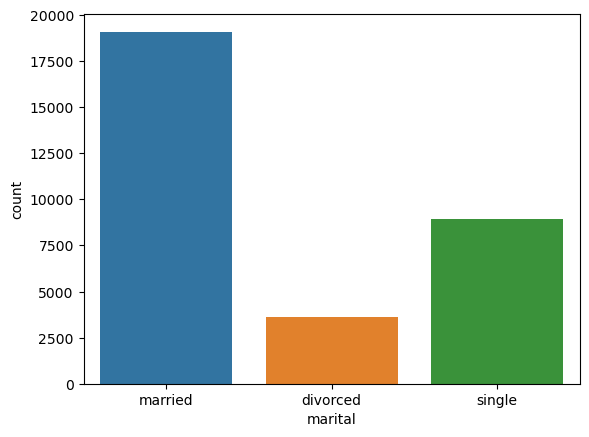

In [24]:
ux=sns.countplot(x='marital',data=df)
print(df['marital'].value_counts())
plt.show()

secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64


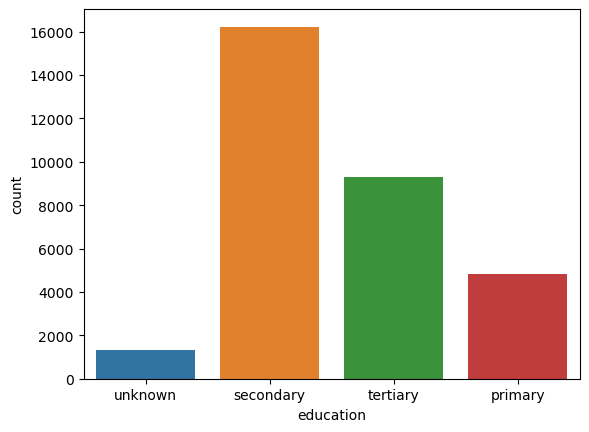

In [25]:
ux=sns.countplot(x='education',data=df)
print(df['education'].value_counts())
plt.show()

no     31062
yes      585
Name: default, dtype: int64


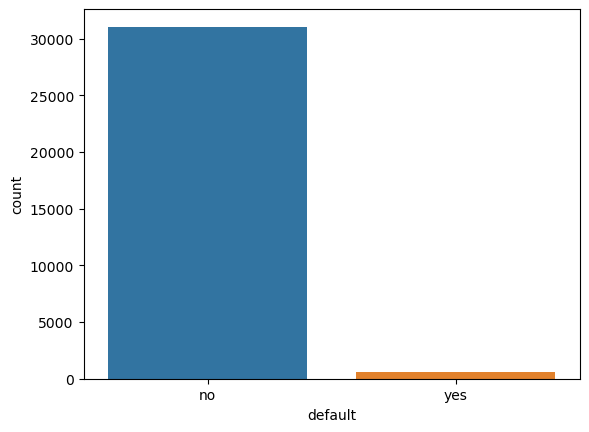

In [26]:
ux=sns.countplot(x='default',data=df)
print(df['default'].value_counts())
plt.show()

 0        2470
 1         137
 2         109
 4          95
 3          88
          ... 
 15120       1
-713         1
-905         1
 4722        1
 2968        1
Name: balance, Length: 6326, dtype: int64


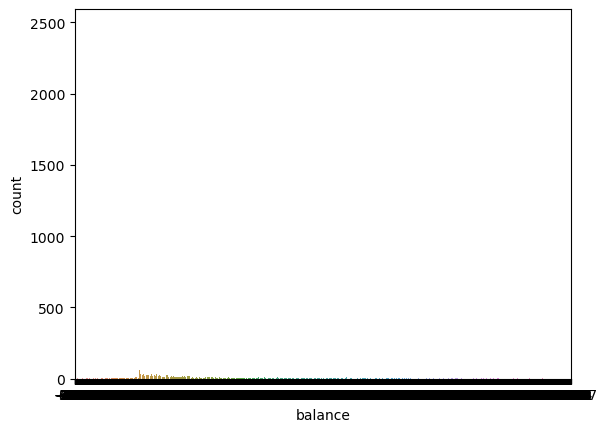

In [27]:
ux=sns.countplot(x='balance',data=df)
print(df['balance'].value_counts())
plt.show()

yes    17584
no     14063
Name: housing, dtype: int64


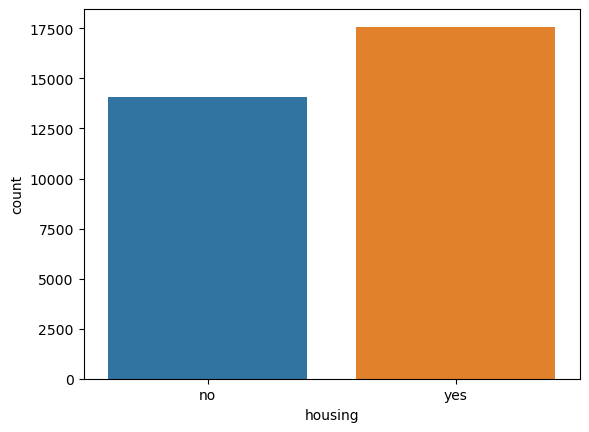

In [28]:
ux=sns.countplot(x='housing',data=df)
print(df['housing'].value_counts())
plt.show()

no     26516
yes     5131
Name: loan, dtype: int64


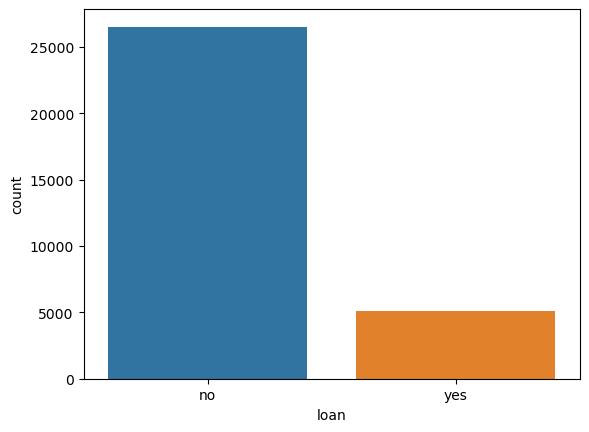

In [29]:
ux=sns.countplot(x='loan',data=df)
print(df['loan'].value_counts())
plt.show()

cellular     20423
unknown       9177
telephone     2047
Name: contact, dtype: int64


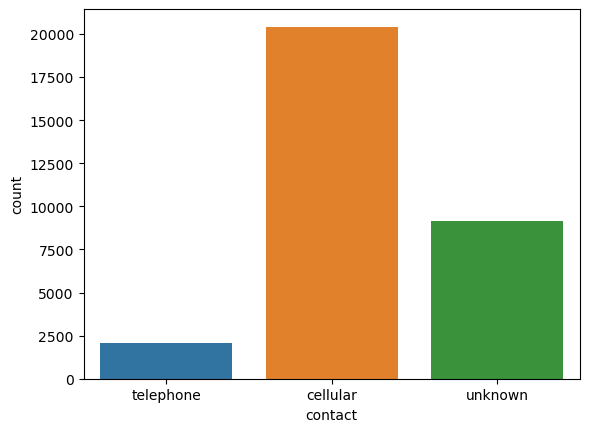

In [30]:
ux=sns.countplot(x='contact',data=df)
print(df['contact'].value_counts())
plt.show()

20    1909
18    1612
21    1445
5     1373
6     1348
17    1344
14    1283
8     1281
28    1276
29    1241
7     1240
19    1228
15    1208
12    1116
13    1099
9     1097
30    1082
4     1016
11    1014
16     981
2      900
27     804
3      761
26     761
23     657
22     640
25     586
31     460
10     360
24     305
1      220
Name: day, dtype: int64


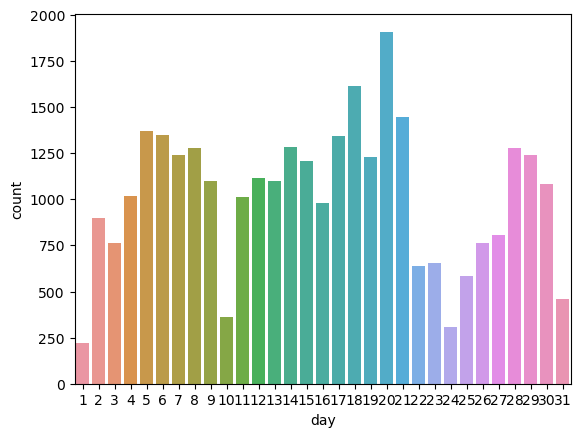

In [31]:
ux=sns.countplot(x='day',data=df)
print(df['day'].value_counts())
plt.show()

may    9669
jul    4844
aug    4333
jun    3738
nov    2783
apr    2055
feb    1827
jan     977
oct     512
sep     410
mar     342
dec     157
Name: month, dtype: int64


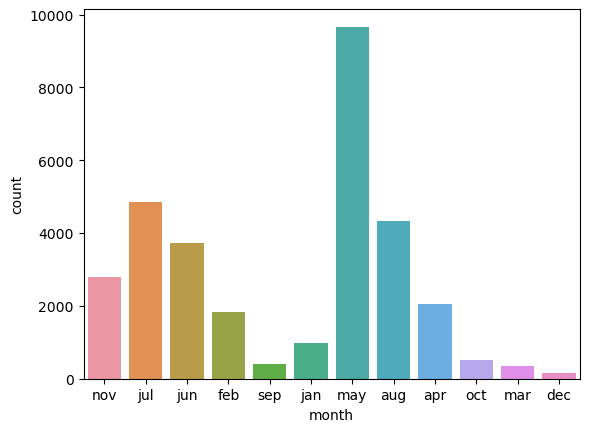

In [32]:
ux=sns.countplot(x='month',data=df)
print(df['month'].value_counts())
plt.show()

90      135
124     130
139     127
88      127
104     127
       ... 
1405      1
1090      1
1261      1
1218      1
1973      1
Name: duration, Length: 1454, dtype: int64


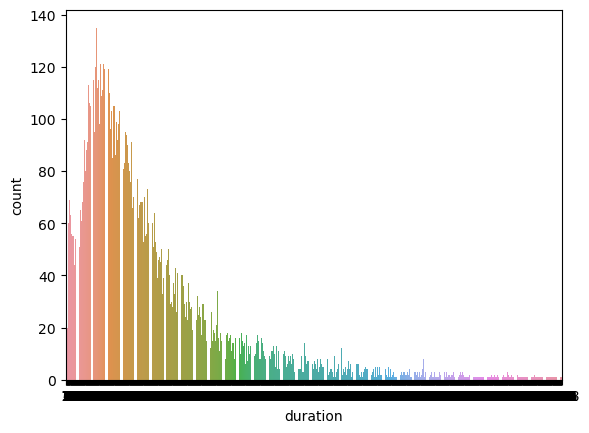

In [33]:
ux=sns.countplot(x='duration',data=df)
print(df['duration'].value_counts())
plt.show()

1     12262
2      8798
3      3858
4      2442
5      1245
6       916
7       518
8       356
9       236
10      184
11      126
12      102
13       93
14       68
15       61
16       54
17       52
20       37
18       37
19       30
21       19
22       18
25       17
28       14
23       13
24       13
29       12
26        9
31        9
27        8
30        6
32        6
33        5
34        5
43        3
35        3
38        3
37        2
63        1
41        1
50        1
55        1
44        1
36        1
39        1
Name: campaign, dtype: int64


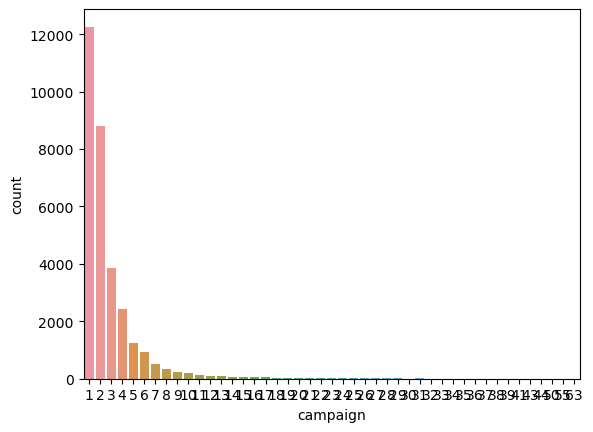

In [34]:
ux=sns.countplot(x='campaign',data=df)
print(df['campaign'].value_counts())
plt.show()

-1      25924
 182      118
 92       100
 91        87
 183       85
        ...  
 51         1
 20         1
 25         1
 526        1
 382        1
Name: pdays, Length: 509, dtype: int64


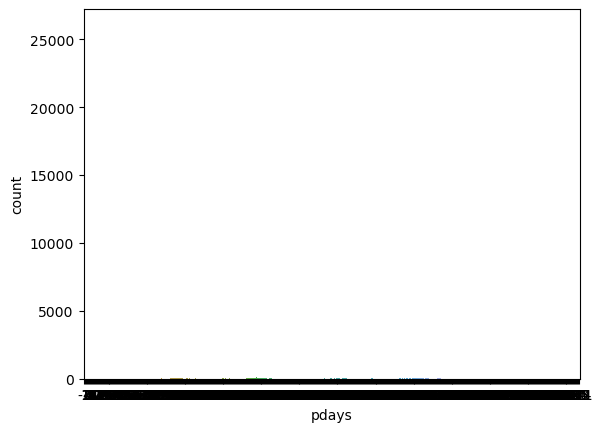

In [35]:
ux=sns.countplot(x='pdays',data=df)
print(df['pdays'].value_counts())
plt.show()

0      25924
1       1921
2       1481
3        780
4        501
5        311
6        188
7        138
8         81
9         64
10        49
11        46
13        30
12        30
15        15
14        14
17        11
16         8
19         8
23         6
18         5
20         5
21         4
22         4
25         4
27         4
26         2
29         2
24         2
275        1
28         1
32         1
30         1
38         1
58         1
35         1
41         1
37         1
Name: previous, dtype: int64


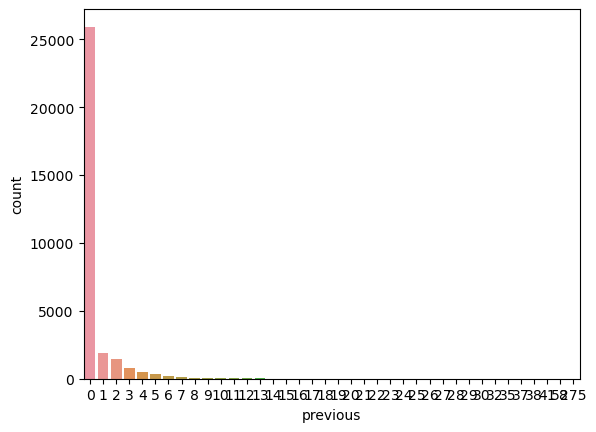

In [36]:
ux=sns.countplot(x='previous',data=df)
print(df['previous'].value_counts())
plt.show()

unknown    25929
failure     3362
other       1288
success     1068
Name: poutcome, dtype: int64


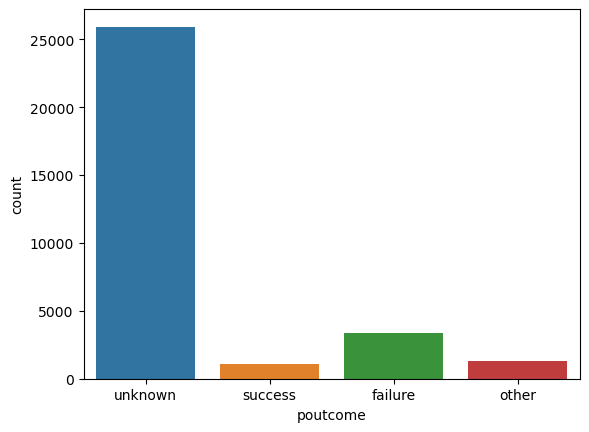

In [37]:
ux=sns.countplot(x='poutcome',data=df)
print(df['poutcome'].value_counts())
plt.show()

Multivariate Analysis --->here we consider more than 2 features to visualize the data.



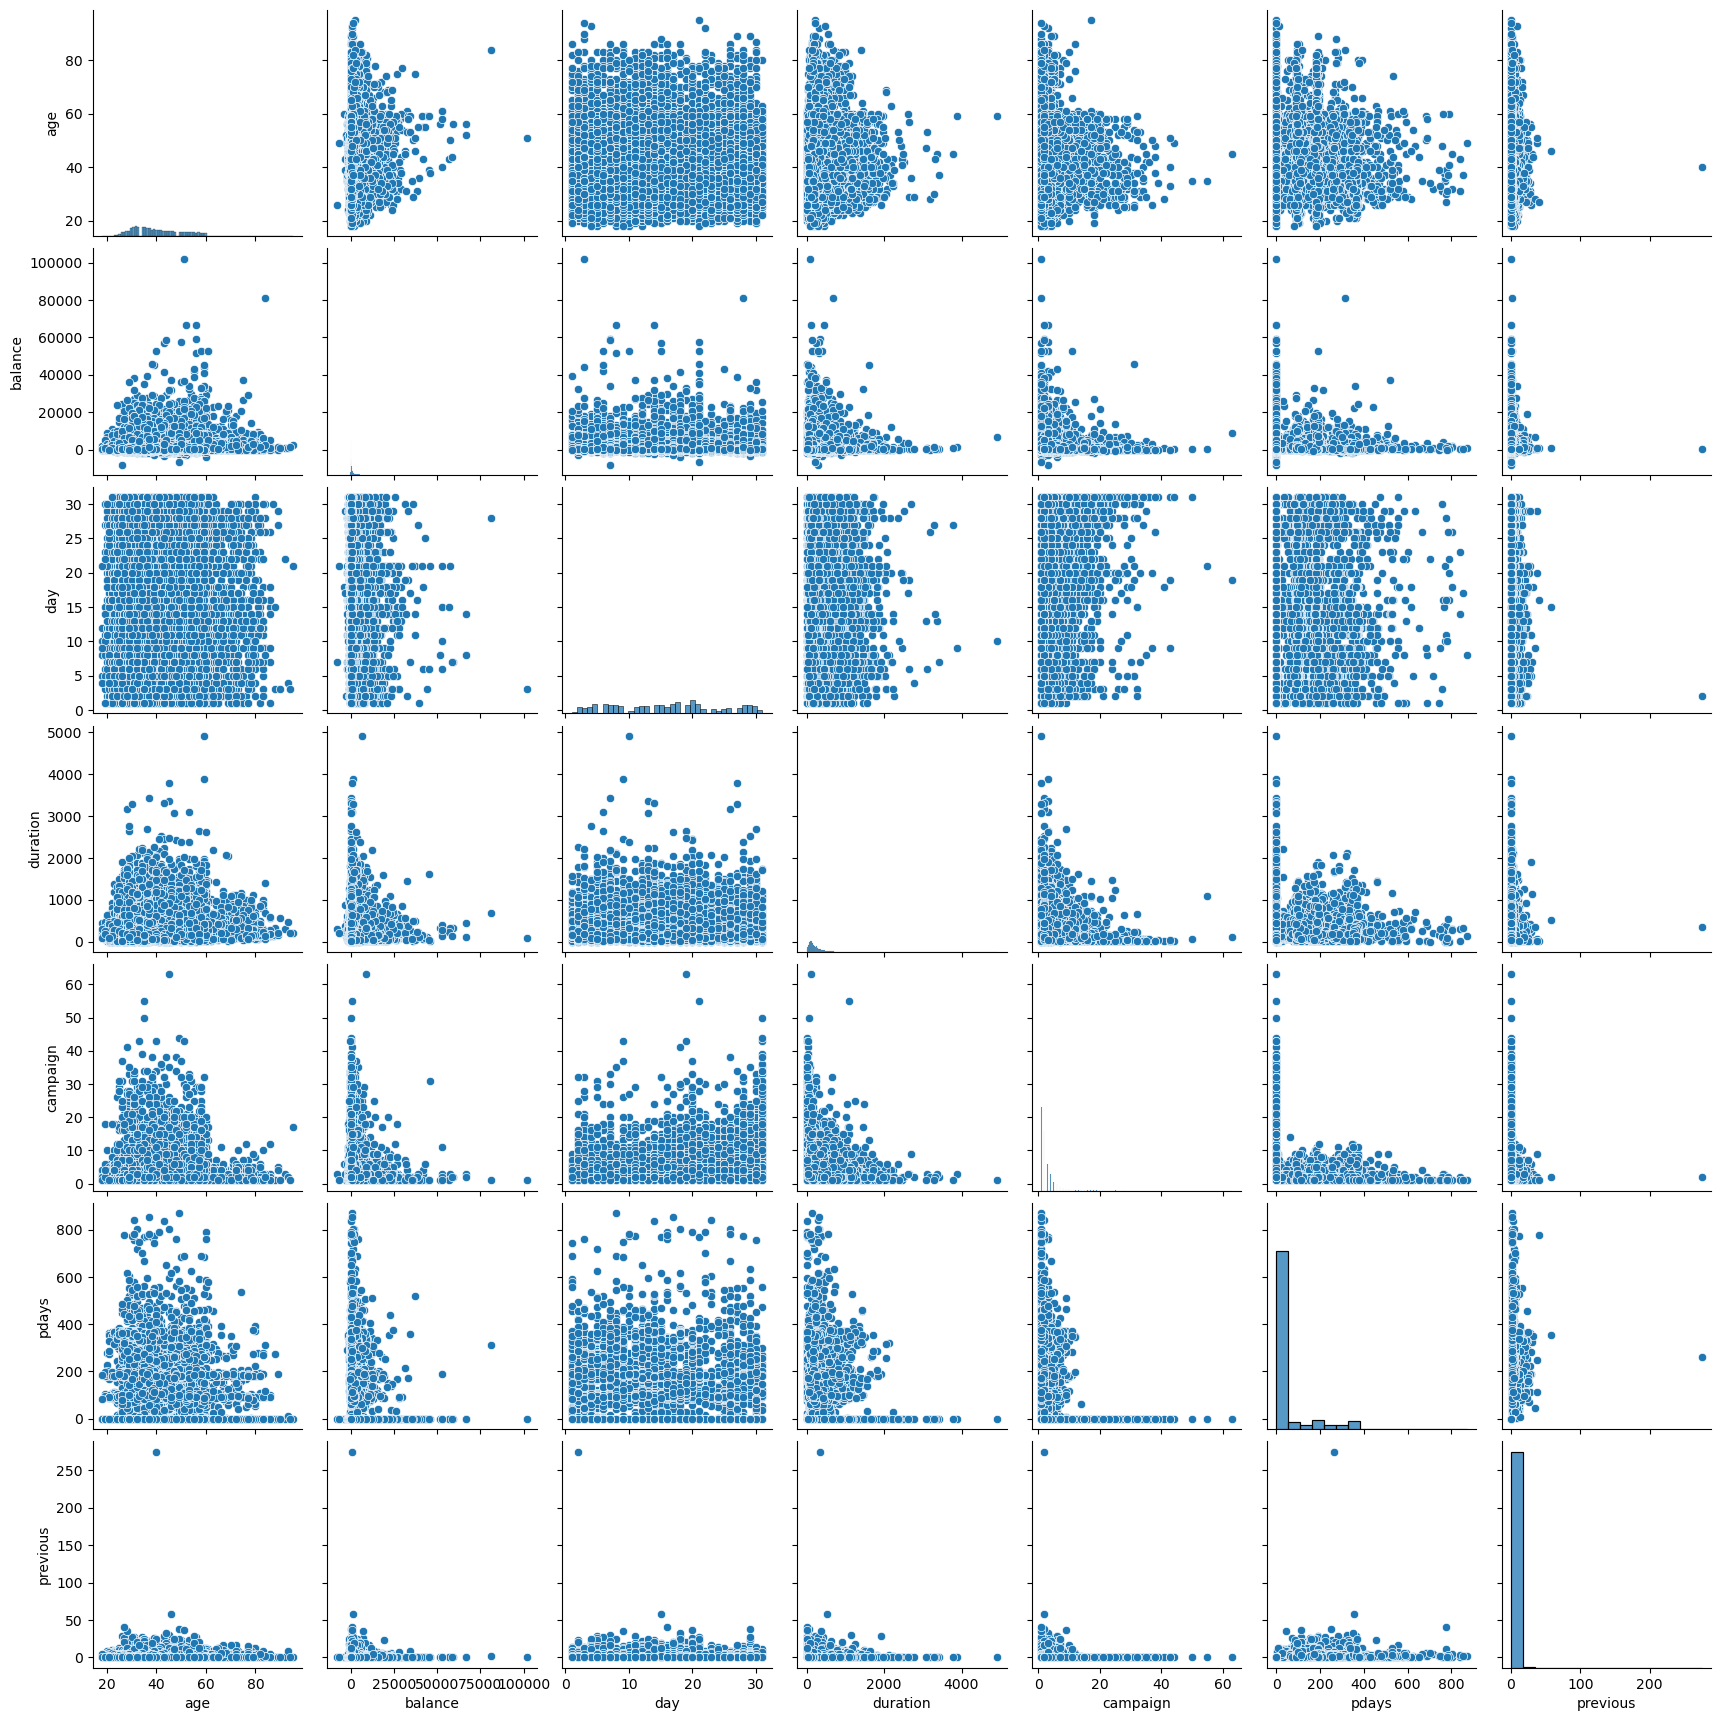

In [38]:
sns.pairplot(df)
plt.show()

Here we are checking outliers in the data.

age            Axes(0.125,0.53;0.133621x0.35)
balance     Axes(0.285345,0.53;0.133621x0.35)
day          Axes(0.44569,0.53;0.133621x0.35)
duration    Axes(0.606034,0.53;0.133621x0.35)
campaign    Axes(0.766379,0.53;0.133621x0.35)
pdays          Axes(0.125,0.11;0.133621x0.35)
previous    Axes(0.285345,0.11;0.133621x0.35)
dtype: object

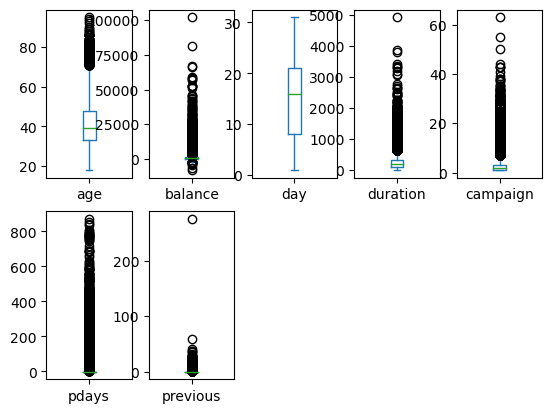

In [39]:
df.plot(kind='box',subplots=True,layout=(2,5))

As you can see outliers are present in this dataset to remove the outliers we use Zscore method to remove the outliers.

Encoding technique (here we are using encoding method to change categorical data to numerical data.)

In [40]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=oe.fit_transform(df[i].values.reshape(-1,1))
        df

In [41]:
df

age   job  marital  education  default  balance  housing  loan  \
0       56   0.0      1.0        3.0      0.0     1933      0.0   0.0   
1       31  11.0      1.0        1.0      0.0        3      0.0   0.0   
2       27   7.0      1.0        1.0      0.0      891      1.0   0.0   
3       57   4.0      0.0        2.0      0.0     3287      0.0   0.0   
4       31   9.0      1.0        1.0      0.0      119      1.0   0.0   
...    ...   ...      ...        ...      ...      ...      ...   ...   
31642   29   4.0      2.0        2.0      0.0        0      1.0   0.0   
31643   53   4.0      0.0        2.0      0.0      380      0.0   1.0   
31644   32   4.0      2.0        2.0      0.0      312      0.0   0.0   
31645   57   9.0      1.0        1.0      0.0      225      1.0   0.0   
31646   55   4.0      0.0        1.0      0.0      204      1.0   0.0   

       contact  day  month  duration  campaign  pdays  previous  poutcome  \
0          1.0   19    9.0        44         2     -1         0       3.0   
1          0.0   20    5.0        91         2     -1         0       3.0   
2          0.0   18    5.0       240         1     -1         0       3.0   
3          0.0   22    6.0       867         1     84         3       2.0   
4          0.0    4    3.0       380         1     -1         0       3.0   
...        ...  ...    ...       ...       ...    ...       ...       ...   
31642      0.0   12    8.0       116         2     -1         0       3.0   
31643      0.0    5    6.0       438         2     -1         0       3.0   
31644      0.0    7    1.0        37         3     -1         0       3.0   
31645      1.0   15    8.0        22         7    337        12       0.0   
31646      0.0   11    5.0      1973         2     -1         0       3.0   

       subscribed  
0             0.0  
1             0.0  
2             0.0  
3             1.0  
4             0.0  
...           ...  
31642         0.0  
31643         1.0  
31644         0.0  
31645         0.0  
31646         1.0  

[31647 rows x 17 columns]

Checking Skewness

In [42]:
df.skew()

age            0.681607
job            0.264817
marital       -0.100071
education      0.199441
default        7.149903
balance        7.995696
housing       -0.223918
loan           1.833474
contact        0.758602
day            0.087185
month         -0.486498
duration       3.199766
campaign       4.873935
pdays          2.642374
previous      49.302348
poutcome      -1.996421
subscribed     2.377445
dtype: float64

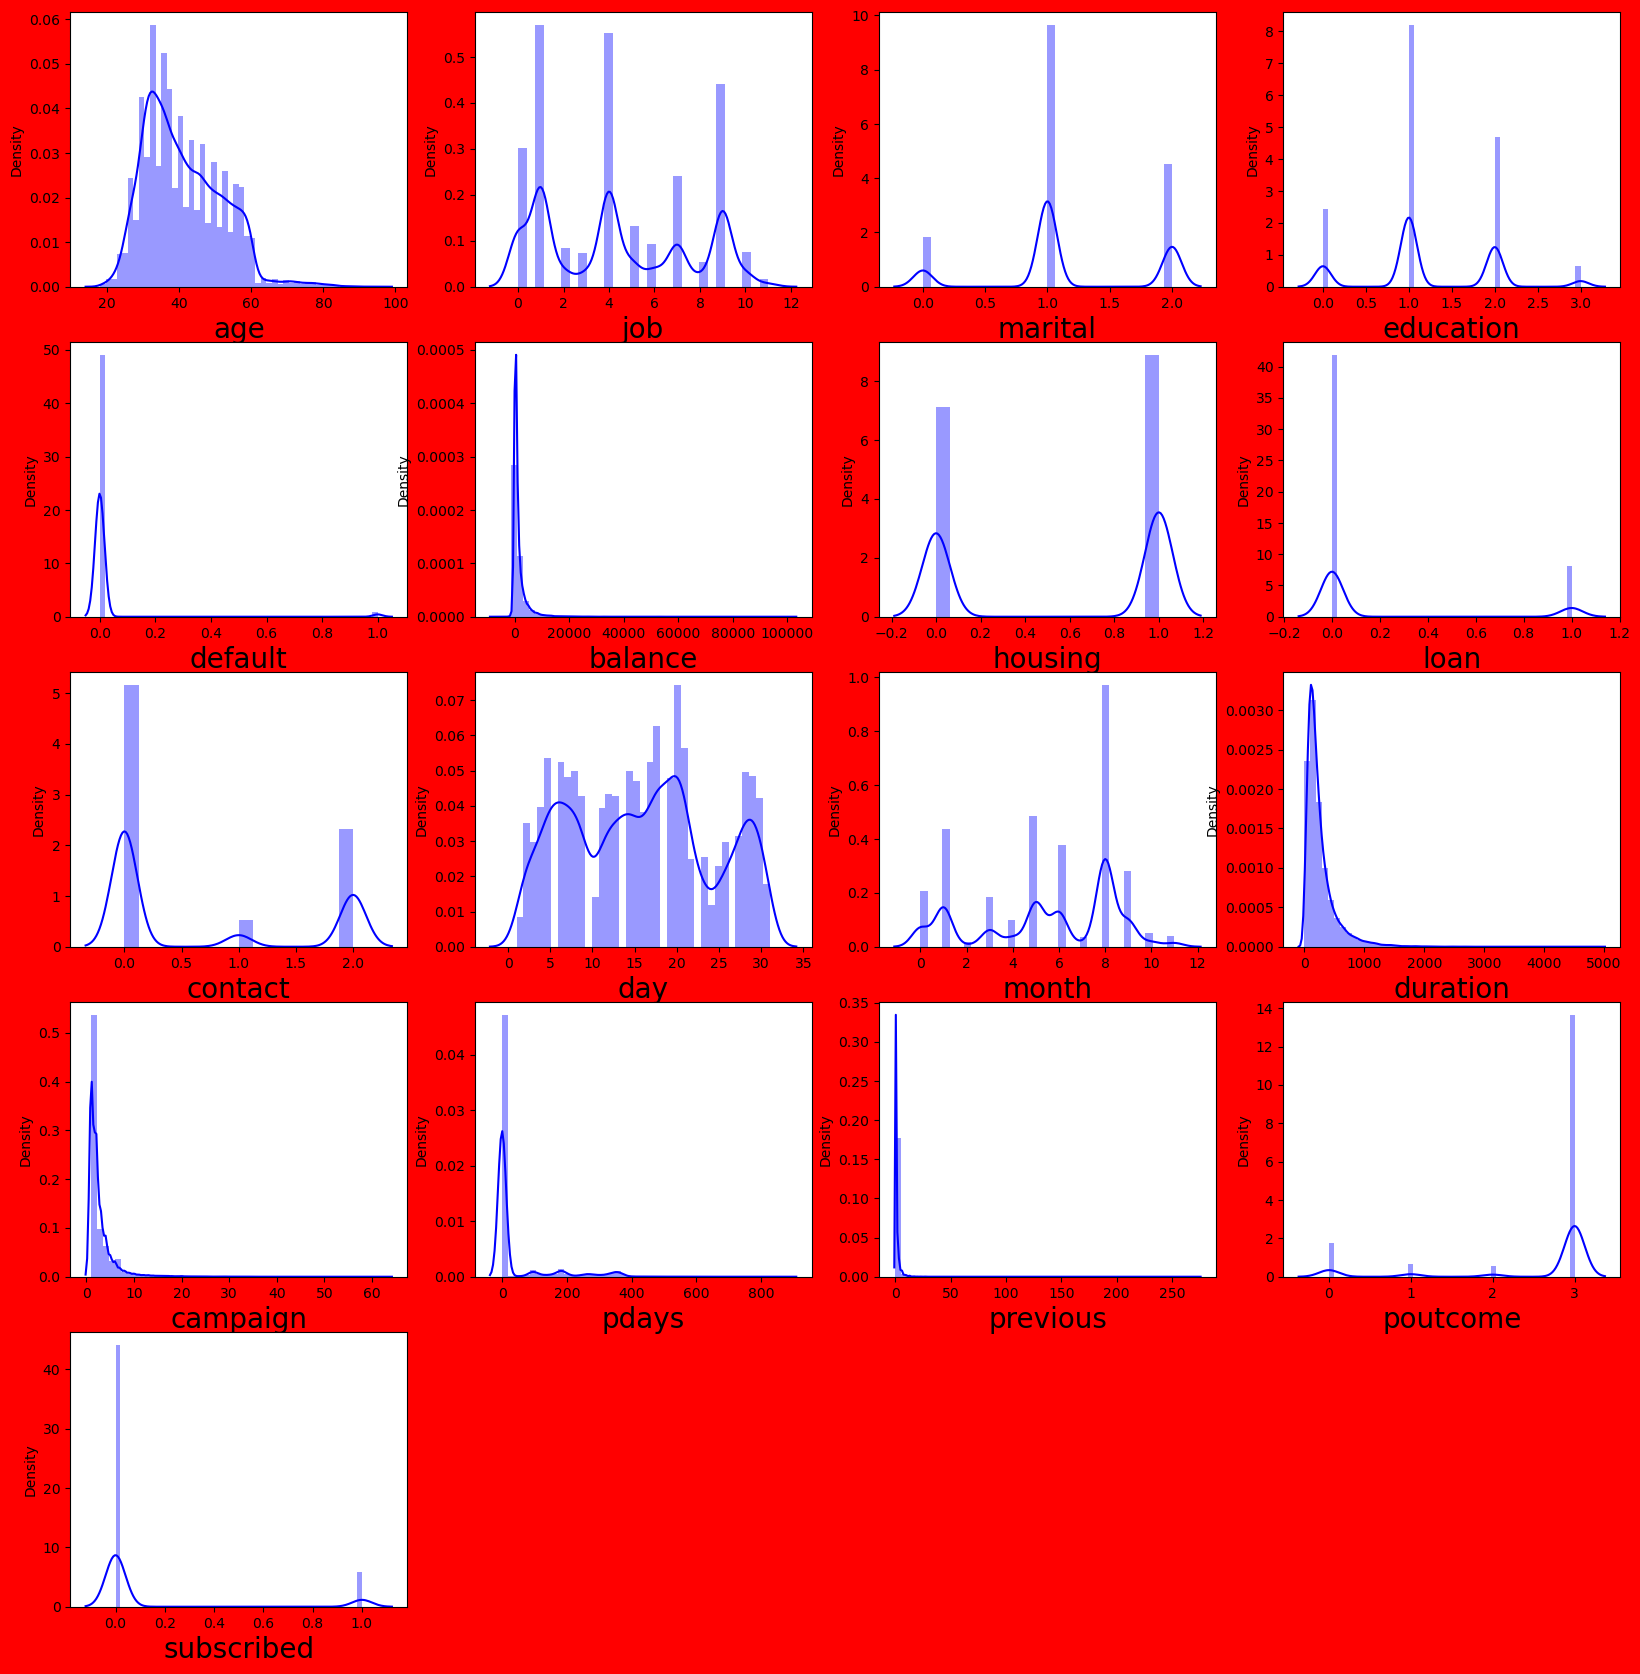

In [43]:
plt.figure(figsize=(20,25),facecolor='red')
num=1
for column in df:
    if num<=18:
        ax=plt.subplot(6,4,num)
        sns.distplot(df[column],color='b')
        plt.xlabel(column,fontsize=20)
        
    num+=1
plt.show()

Here we are checking the skewness of the data.as you see above default,balance,campaign,pdays,previous,duration,loan,poutcome,subscribed,have skewness here we are using squareroot and cuberoot method to remove the skewness.

In [44]:
df['previous']=np.sqrt(df['previous'])

In [45]:
df.skew()

age           0.681607
job           0.264817
marital      -0.100071
education     0.199441
default       7.149903
balance       7.995696
housing      -0.223918
loan          1.833474
contact       0.758602
day           0.087185
month        -0.486498
duration      3.199766
campaign      4.873935
pdays         2.642374
previous      2.979019
poutcome     -1.996421
subscribed    2.377445
dtype: float64

In [46]:
df['previous']=np.cbrt(df['previous'])

In [47]:
df.skew()

age           0.681607
job           0.264817
marital      -0.100071
education     0.199441
default       7.149903
balance       7.995696
housing      -0.223918
loan          1.833474
contact       0.758602
day           0.087185
month        -0.486498
duration      3.199766
campaign      4.873935
pdays         2.642374
previous      1.745445
poutcome     -1.996421
subscribed    2.377445
dtype: float64

In [48]:
df['default']=np.sqrt(df['default'])

In [49]:
df.skew()

age           0.681607
job           0.264817
marital      -0.100071
education     0.199441
default       7.149903
balance       7.995696
housing      -0.223918
loan          1.833474
contact       0.758602
day           0.087185
month        -0.486498
duration      3.199766
campaign      4.873935
pdays         2.642374
previous      1.745445
poutcome     -1.996421
subscribed    2.377445
dtype: float64

In [50]:
df['default']=np.cbrt(df['default'])

In [51]:
df.skew()

age           0.681607
job           0.264817
marital      -0.100071
education     0.199441
default       7.149903
balance       7.995696
housing      -0.223918
loan          1.833474
contact       0.758602
day           0.087185
month        -0.486498
duration      3.199766
campaign      4.873935
pdays         2.642374
previous      1.745445
poutcome     -1.996421
subscribed    2.377445
dtype: float64

In [52]:
df['balance']=np.cbrt(df['balance'])

In [53]:
df.skew()

age           0.681607
job           0.264817
marital      -0.100071
education     0.199441
default       7.149903
balance      -0.086014
housing      -0.223918
loan          1.833474
contact       0.758602
day           0.087185
month        -0.486498
duration      3.199766
campaign      4.873935
pdays         2.642374
previous      1.745445
poutcome     -1.996421
subscribed    2.377445
dtype: float64

In [54]:
df['loan']=np.cbrt(df['loan'])

In [55]:
df['duration']=np.cbrt(df['duration'])

In [56]:
df['campaign']=np.cbrt(df['campaign'])

In [57]:
df.skew()

age           0.681607
job           0.264817
marital      -0.100071
education     0.199441
default       7.149903
balance      -0.086014
housing      -0.223918
loan          1.833474
contact       0.758602
day           0.087185
month        -0.486498
duration      0.647275
campaign      1.667938
pdays         2.642374
previous      1.745445
poutcome     -1.996421
subscribed    2.377445
dtype: float64

In [58]:
df['loan']=np.sqrt(df['loan'])

In [59]:
df.skew()

age           0.681607
job           0.264817
marital      -0.100071
education     0.199441
default       7.149903
balance      -0.086014
housing      -0.223918
loan          1.833474
contact       0.758602
day           0.087185
month        -0.486498
duration      0.647275
campaign      1.667938
pdays         2.642374
previous      1.745445
poutcome     -1.996421
subscribed    2.377445
dtype: float64

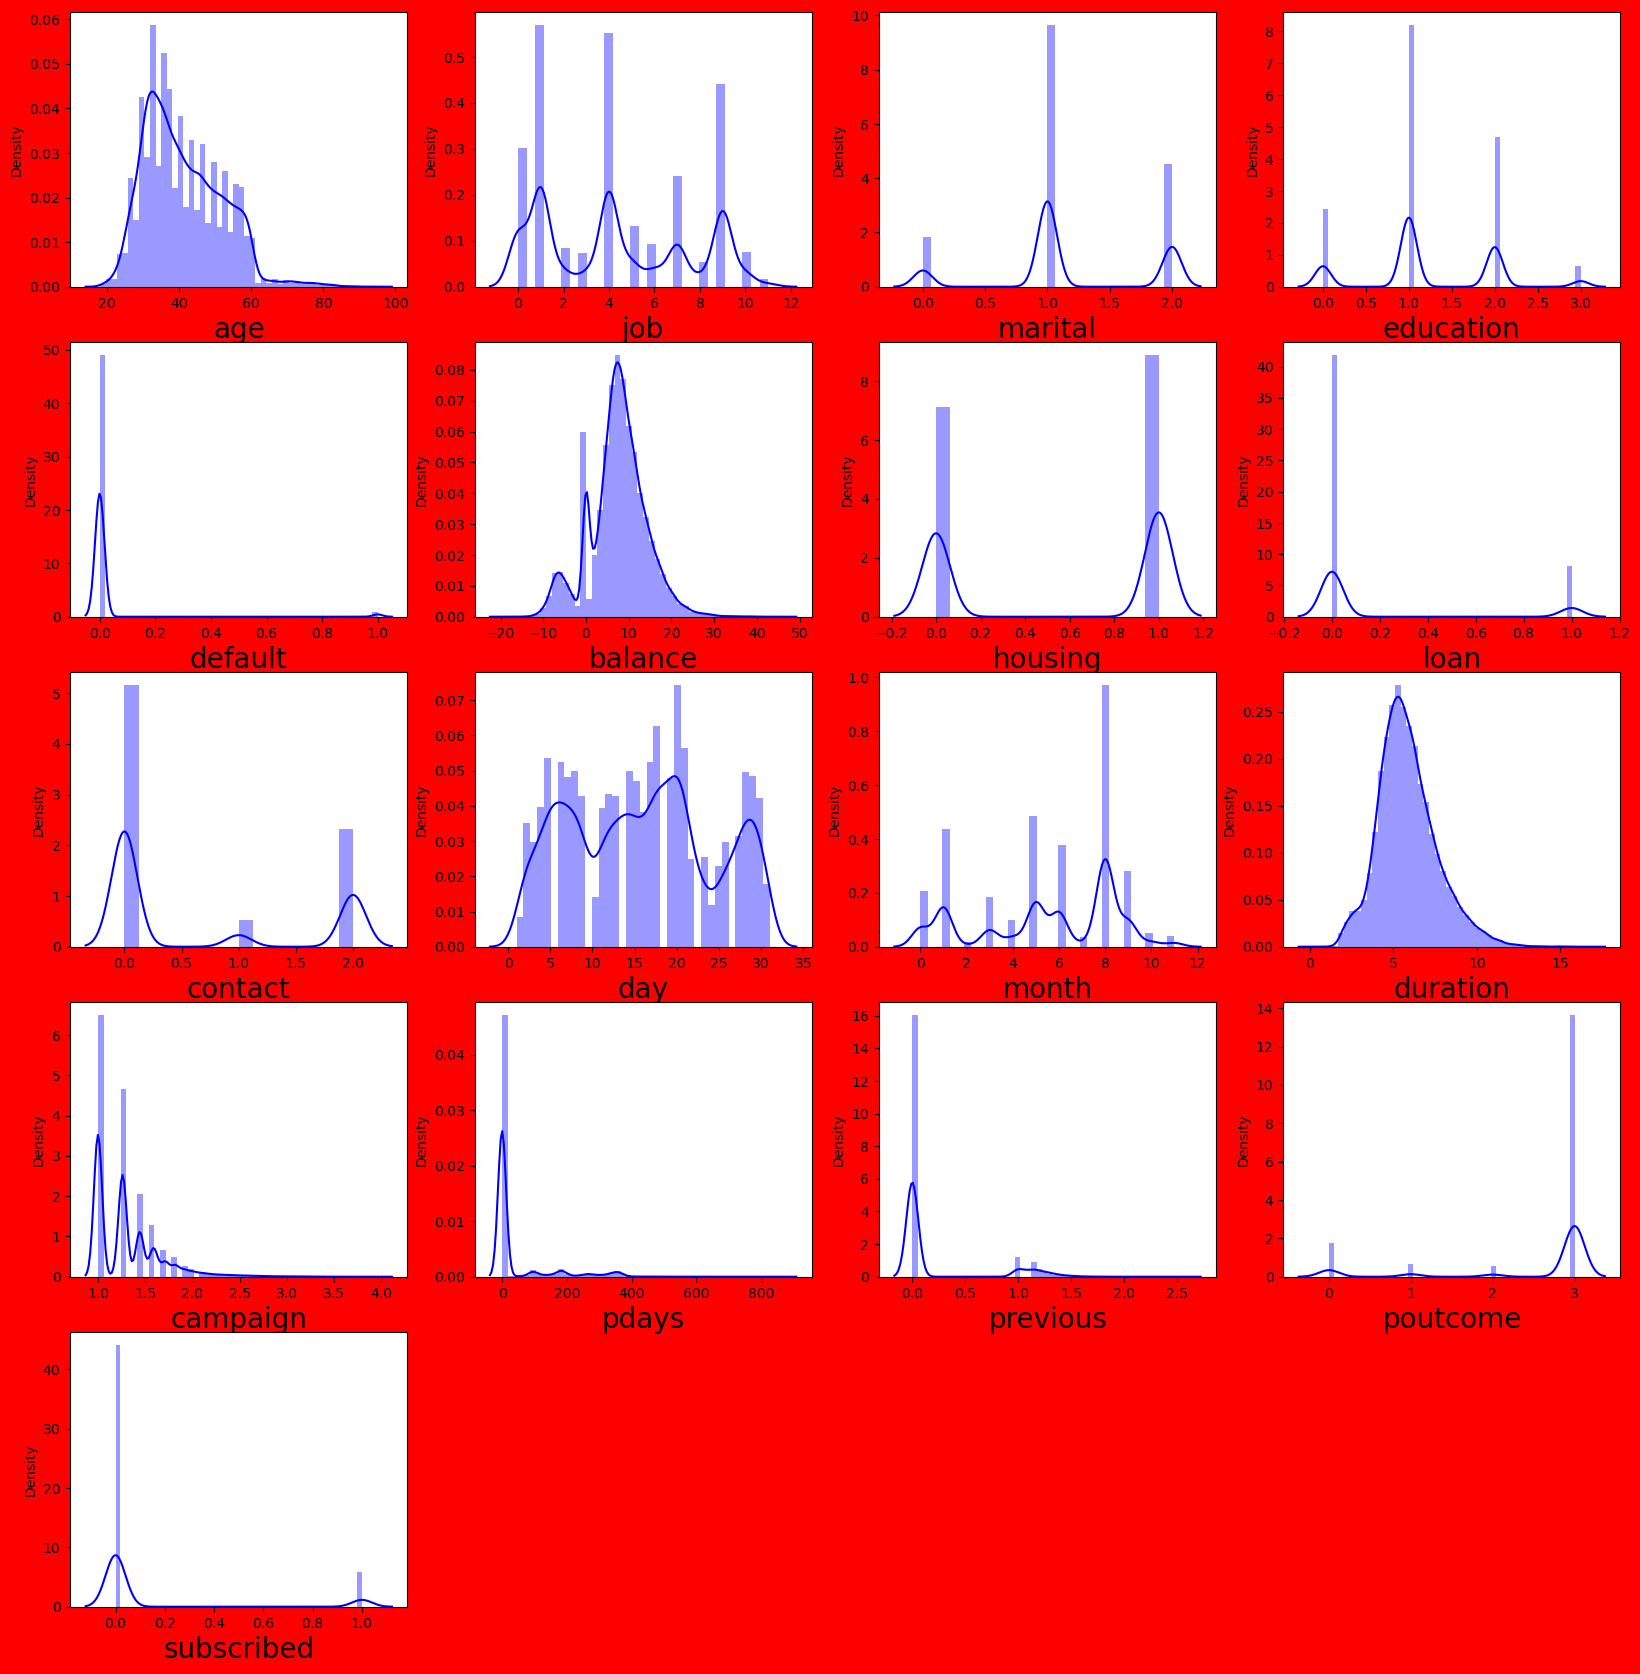

In [60]:
plt.figure(figsize=(20,25),facecolor='red')
num=1
for column in df:
    if num<=18:
        ax=plt.subplot(6,4,num)
        sns.distplot(df[column],color='b')
        plt.xlabel(column,fontsize=20)
        
    num+=1
plt.show()

In [61]:
df['pdays']=np.cbrt(df['pdays'])

In [62]:
df.skew()

age           0.681607
job           0.264817
marital      -0.100071
education     0.199441
default       7.149903
balance      -0.086014
housing      -0.223918
loan          1.833474
contact       0.758602
day           0.087185
month        -0.486498
duration      0.647275
campaign      1.667938
pdays         1.779036
previous      1.745445
poutcome     -1.996421
subscribed    2.377445
dtype: float64

age               Axes(0.125,0.77;0.227941x0.11)
job            Axes(0.398529,0.77;0.227941x0.11)
marital        Axes(0.672059,0.77;0.227941x0.11)
education        Axes(0.125,0.638;0.227941x0.11)
default       Axes(0.398529,0.638;0.227941x0.11)
balance       Axes(0.672059,0.638;0.227941x0.11)
housing          Axes(0.125,0.506;0.227941x0.11)
loan          Axes(0.398529,0.506;0.227941x0.11)
contact       Axes(0.672059,0.506;0.227941x0.11)
day              Axes(0.125,0.374;0.227941x0.11)
month         Axes(0.398529,0.374;0.227941x0.11)
duration      Axes(0.672059,0.374;0.227941x0.11)
campaign         Axes(0.125,0.242;0.227941x0.11)
pdays         Axes(0.398529,0.242;0.227941x0.11)
previous      Axes(0.672059,0.242;0.227941x0.11)
poutcome          Axes(0.125,0.11;0.227941x0.11)
subscribed     Axes(0.398529,0.11;0.227941x0.11)
dtype: object

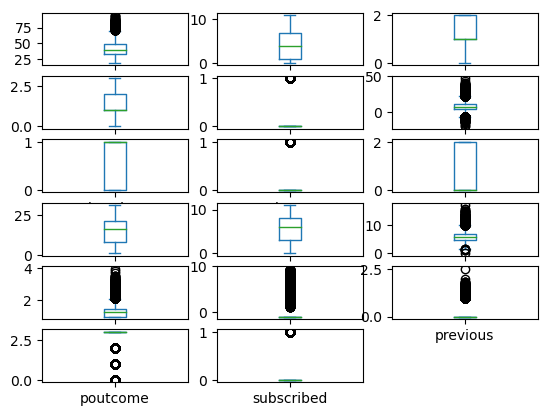

In [63]:
df.plot(kind='box',subplots=True,layout=(6,3))

As you see outliers are present to remove the outliers we use Zscore method to remove the outliers.


In [64]:
from scipy.stats import zscore
out_features=df[['age','balance','duration','campaign','pdays','previous','poutcome']]
z=np.abs(zscore(out_features))
z

age   balance  duration  campaign     pdays  previous  poutcome
0      1.415793  0.757778  1.328474  0.127816  0.461627  0.464984  0.441777
1      0.937156  0.911548  0.775734  0.127816  0.461627  0.464984  0.441777
2      1.313627  0.328224  0.204835  0.873593  0.461627  0.464984  0.441777
3      1.509911  1.123262  2.101938  0.873593  1.542654  2.208252  0.576498
4      0.937156  0.384677  0.792477  0.873593  0.461627  0.464984  0.441777
...         ...       ...       ...       ...       ...       ...       ...
31642  1.125392  1.130128  0.559197  0.127816  0.461627  0.464984  0.441777
31643  1.133439  0.032392  0.993105  0.127816  0.461627  0.464984  0.441777
31644  0.843038  0.102219  1.441655  0.395329  0.461627  0.464984  0.441777
31645  1.509911  0.208341  1.744523  1.745828  2.503686  2.903083  2.613048
31646  1.321675  0.237960  3.819603  0.127816  0.461627  0.464984  0.441777

[31647 rows x 7 columns]

In [65]:
threshold=3
np.where(z>3)

(array([   21,   109,   134, ..., 31598, 31622, 31646], dtype=int64),
 array([3, 1, 3, ..., 3, 0, 2], dtype=int64))

In [66]:
df1=df[(z<3).all(axis=1)]

In [67]:
df1.shape

(30277, 17)

In [68]:
print('old dataframe:',df.shape[0])
print('new dataframe:',df1.shape[0])

old dataframe: 31647
new dataframe: 30277


In [69]:
print('datalosspercentage:',((df.shape[0]-df1.shape[0])/df.shape[0])*100)

datalosspercentage: 4.329004329004329


As we can see there is less than 10% of data loss after removing the outliers so it is considerable.

In [70]:
df1

age   job  marital  education  default    balance  housing  loan  \
0       56   0.0      1.0        3.0      0.0  12.456918      0.0   0.0   
1       31  11.0      1.0        1.0      0.0   1.442250      0.0   0.0   
2       27   7.0      1.0        1.0      0.0   9.622603      1.0   0.0   
3       57   4.0      0.0        2.0      0.0  14.868480      0.0   0.0   
4       31   9.0      1.0        1.0      0.0   4.918685      1.0   0.0   
...    ...   ...      ...        ...      ...        ...      ...   ...   
31641   37   9.0      2.0        2.0      0.0  10.939057      0.0   0.0   
31642   29   4.0      2.0        2.0      0.0   0.000000      1.0   0.0   
31643   53   4.0      0.0        2.0      0.0   7.243156      0.0   1.0   
31644   32   4.0      2.0        2.0      0.0   6.782423      0.0   0.0   
31645   57   9.0      1.0        1.0      0.0   6.082202      1.0   0.0   

       contact  day  month  duration  campaign     pdays  previous  poutcome  \
0          1.0   19    9.0  3.530348  1.259921 -1.000000  0.000000       3.0   
1          0.0   20    5.0  4.497941  1.259921 -1.000000  0.000000       3.0   
2          0.0   18    5.0  6.214465  1.000000 -1.000000  0.000000       3.0   
3          0.0   22    6.0  9.535417  1.000000  4.379519  1.200937       2.0   
4          0.0    4    3.0  7.243156  1.000000 -1.000000  0.000000       3.0   
...        ...  ...    ...       ...       ...       ...       ...       ...   
31641      2.0    6    6.0  7.617412  1.259921 -1.000000  0.000000       3.0   
31642      0.0   12    8.0  4.876999  1.259921 -1.000000  0.000000       3.0   
31643      0.0    5    6.0  7.594363  1.259921 -1.000000  0.000000       3.0   
31644      0.0    7    1.0  3.332222  1.442250 -1.000000  0.000000       3.0   
31645      1.0   15    8.0  2.802039  1.912931  6.958943  1.513086       0.0   

       subscribed  
0             0.0  
1             0.0  
2             0.0  
3             1.0  
4             0.0  
...           ...  
31641         0.0  
31642         0.0  
31643         1.0  
31644         0.0  
31645         0.0  

[30277 rows x 17 columns]

In [71]:
df['subscribed'].unique()

array([0., 1.])

Checking the Correlation b/w Target variable and Independent variable.

In [72]:
df.corr()

age       job   marital  education   default   balance  \
age         1.000000 -0.020765 -0.406024  -0.102356 -0.016117  0.102655   
job        -0.020765  1.000000  0.066124   0.170347 -0.005217  0.030541   
marital    -0.406024  0.066124  1.000000   0.107547 -0.009591  0.029260   
education  -0.102356  0.170347  0.107547   1.000000 -0.006774  0.075759   
default    -0.016117 -0.005217 -0.009591  -0.006774  1.000000 -0.198400   
balance     0.102655  0.030541  0.029260   0.075759 -0.198400  1.000000   
housing    -0.183775 -0.125347 -0.017846  -0.095376 -0.011823 -0.087058   
loan       -0.012657 -0.039049 -0.041654  -0.045950  0.081567 -0.142789   
contact     0.026733 -0.078253 -0.040180  -0.112000  0.014053 -0.047563   
day        -0.011056  0.020951 -0.007686   0.017902  0.009996 -0.011106   
month      -0.038368 -0.089384 -0.003834  -0.055967  0.004694 -0.002360   
duration   -0.008672  0.001740  0.013765   0.002867 -0.009781  0.038476   
campaign    0.016974  0.004734 -0.020674  -0.001402  0.018914 -0.035939   
pdays      -0.007257 -0.007784  0.025247   0.020848 -0.036851  0.060453   
previous    0.002908  0.000385  0.027350   0.031938 -0.038692  0.072791   
poutcome    0.006466  0.007101 -0.019770  -0.019007  0.035067 -0.055961   
subscribed  0.024538  0.038921  0.046043   0.066051 -0.020168  0.097107   

             housing      loan   contact       day     month  duration  \
age        -0.183775 -0.012657  0.026733 -0.011056 -0.038368 -0.008672   
job        -0.125347 -0.039049 -0.078253  0.020951 -0.089384  0.001740   
marital    -0.017846 -0.041654 -0.040180 -0.007686 -0.003834  0.013765   
education  -0.095376 -0.045950 -0.112000  0.017902 -0.055967  0.002867   
default    -0.011823  0.081567  0.014053  0.009996  0.004694 -0.009781   
balance    -0.087058 -0.142789 -0.047563 -0.011106 -0.002360  0.038476   
housing     1.000000  0.036244  0.195103 -0.025666  0.271442  0.001012   
loan        0.036244  1.000000 -0.009213  0.014769  0.024186 -0.011323   
contact     0.195103 -0.009213  1.000000 -0.027046  0.362934 -0.032611   
day        -0.025666  0.014769 -0.027046  1.000000 -0.000604 -0.052736   
month       0.271442  0.024186  0.362934 -0.000604  1.000000  0.005335   
duration    0.001012 -0.011323 -0.032611 -0.052736  0.005335  1.000000   
campaign   -0.033177  0.006838  0.014552  0.164516 -0.132575 -0.143372   
pdays       0.081725 -0.025042 -0.281906 -0.084394  0.028869  0.016528   
previous    0.054866 -0.026778 -0.283889 -0.080113  0.030644  0.017669   
poutcome   -0.092677  0.010919  0.272083  0.077586 -0.029369 -0.001754   
subscribed -0.141092 -0.072266 -0.150051 -0.029600 -0.028088  0.379716   

            campaign     pdays  previous  poutcome  subscribed  
age         0.016974 -0.007257  0.002908  0.006466    0.024538  
job         0.004734 -0.007784  0.000385  0.007101    0.038921  
marital    -0.020674  0.025247  0.027350 -0.019770    0.046043  
education  -0.001402  0.020848  0.031938 -0.019007    0.066051  
default     0.018914 -0.036851 -0.038692  0.035067   -0.020168  
balance    -0.035939  0.060453  0.072791 -0.055961    0.097107  
housing    -0.033177  0.081725  0.054866 -0.092677   -0.141092  
loan        0.006838 -0.025042 -0.026778  0.010919   -0.072266  
contact     0.014552 -0.281906 -0.283889  0.272083   -0.150051  
day         0.164516 -0.084394 -0.080113  0.077586   -0.029600  
month      -0.132575  0.028869  0.030644 -0.029369   -0.028088  
duration   -0.143372  0.016528  0.017669 -0.001754    0.379716  
campaign    1.000000 -0.114032 -0.110512  0.112128   -0.082134  
pdays      -0.114032  1.000000  0.970480 -0.939493    0.152555  
previous   -0.110512  0.970480  1.000000 -0.927501    0.171895  
poutcome    0.112128 -0.939493 -0.927501  1.000000   -0.080895  
subscribed -0.082134  0.152555  0.171895 -0.080895    1.000000

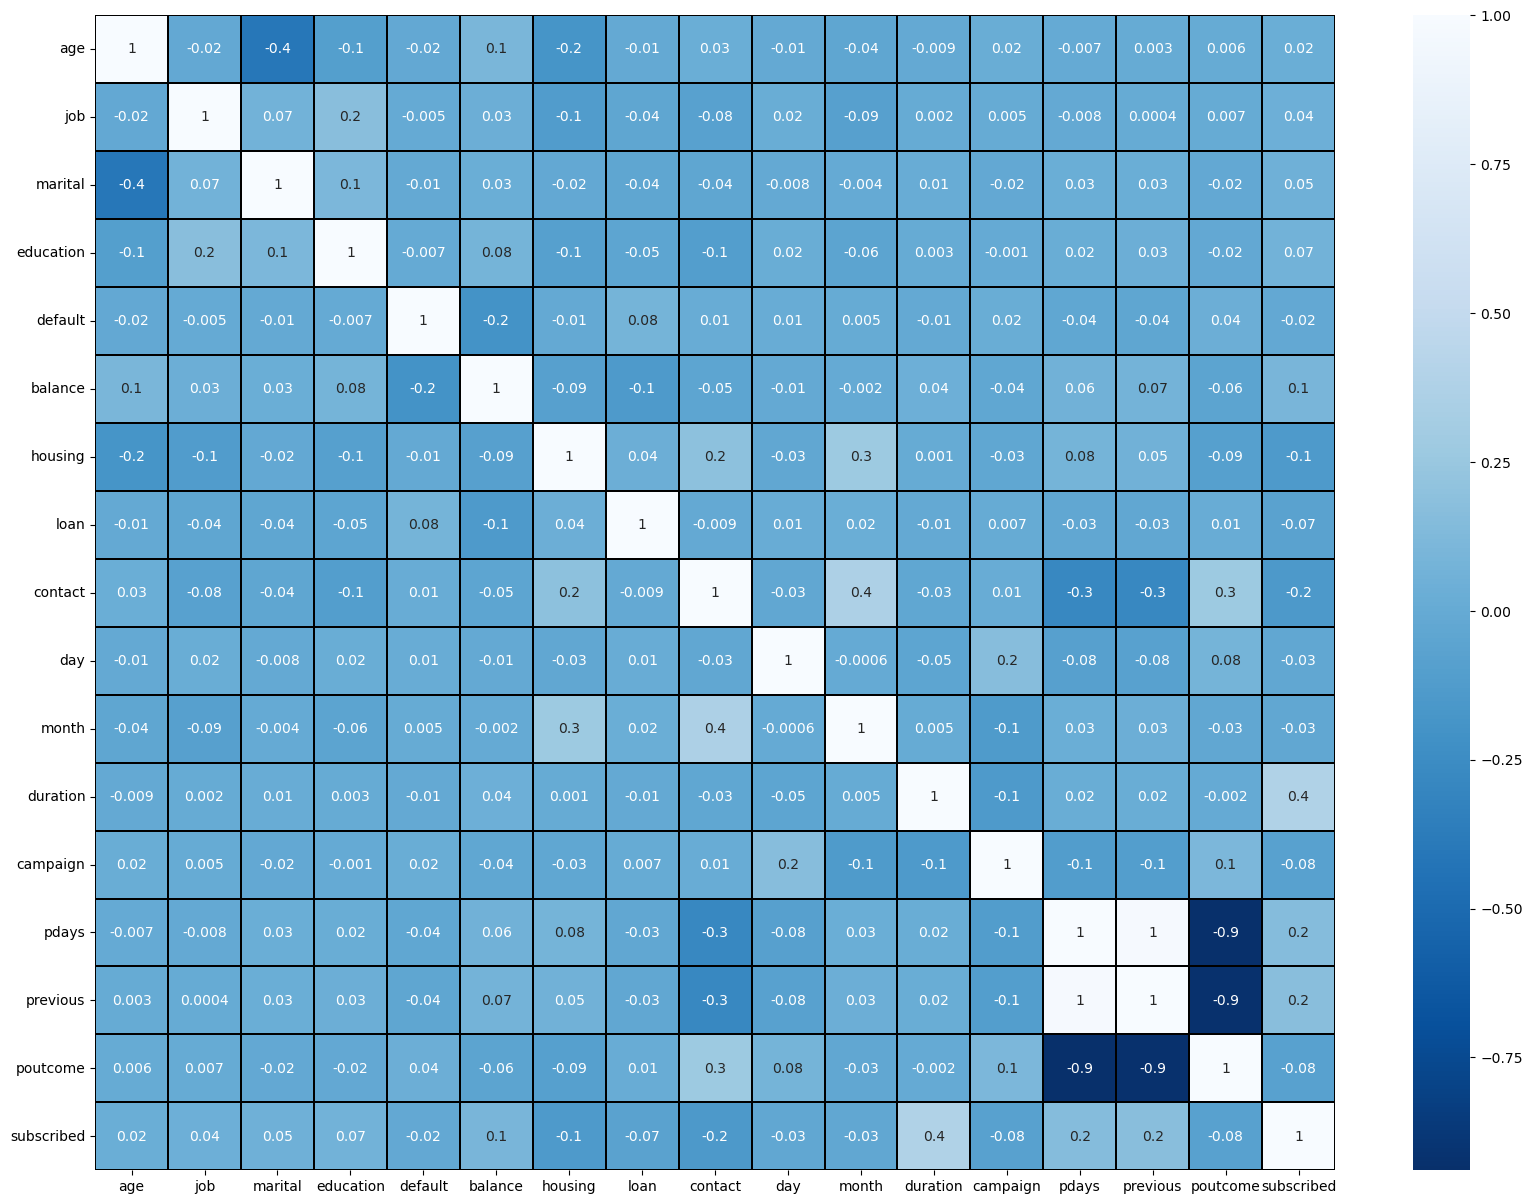

In [73]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),linewidths=0.1,fmt='.1g',linecolor='black',annot=True,cmap='Blues_r')
plt.yticks(rotation=0)
plt.show()
                    

In [74]:
x=df1.drop('subscribed',axis=1)

In [75]:
y=df1['subscribed']

In [76]:
df['subscribed'].unique()

array([0., 1.])

Feature scaling using StandardScaler method.

In [77]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)


In [78]:
x

age       job   marital  education   default   balance   housing  \
0      1.525958 -1.315488 -0.281828   2.384138 -0.136147  0.795552 -1.130642   
1     -0.953197  2.032077 -0.281828  -0.301899 -0.136147 -0.922459 -1.130642   
2     -1.349862  0.814781 -0.281828  -0.301899 -0.136147  0.353470  0.884454   
3      1.625124 -0.098191 -1.929109   1.041120 -0.136147  1.171695 -1.130642   
4     -0.953197  1.423429 -0.281828  -0.301899 -0.136147 -0.380223  0.884454   
...         ...       ...       ...        ...       ...       ...       ...   
30272 -0.358200  1.423429  1.365453   1.041120 -0.136147  0.558804 -1.130642   
30273 -1.151529 -0.098191  1.365453   1.041120 -0.136147 -1.147413  0.884454   
30274  1.228459 -0.098191 -1.929109   1.041120 -0.136147 -0.017664 -1.130642   
30275 -0.854031 -0.098191  1.365453   1.041120 -0.136147 -0.089526 -1.130642   
30276  1.625124  1.423429 -0.281828  -0.301899 -0.136147 -0.198743  0.884454   

           loan   contact       day     month  duration  campaign     pdays  \
0     -0.441663  0.395422  0.394588  1.151099 -1.396453 -0.063507 -0.460176   
1     -0.441663 -0.713423  0.515029 -0.184373 -0.810504 -0.063507 -0.460176   
2     -0.441663 -0.713423  0.274146 -0.184373  0.228978 -0.945947 -0.460176   
3     -0.441663 -0.713423  0.755911  0.149495  2.240060 -0.945947  1.554869   
4     -0.441663 -0.713423 -1.412031 -0.852110  0.851926 -0.945947 -0.460176   
...         ...       ...       ...       ...       ...       ...       ...   
30272 -0.441663  1.504267 -1.171148  0.149495  1.078565 -0.063507 -0.460176   
30273 -0.441663 -0.713423 -0.448501  0.817231 -0.580957 -0.063507 -0.460176   
30274  2.264170 -0.713423 -1.291590  0.149495  1.064608 -0.063507 -0.460176   
30275 -0.441663 -0.713423 -1.050707 -1.519846 -1.516434  0.555504 -0.460176   
30276 -0.441663  0.395422 -0.087177  0.817231 -1.837498  2.153482  2.521063   

       previous  poutcome  
0     -0.463985  0.440343  
1     -0.463985  0.440343  
2     -0.463985  0.440343  
3      2.239713 -0.577698  
4     -0.463985  0.440343  
...         ...       ...  
30272 -0.463985  0.440343  
30273 -0.463985  0.440343  
30274 -0.463985  0.440343  
30275 -0.463985  0.440343  
30276  2.942461 -2.613778  

[30277 rows x 16 columns]

In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns
vif

vif values   features
0     1.273253        age
1     1.050101        job
2     1.229762    marital
3     1.068118  education
4     1.045714    default
5     1.088716    balance
6     1.189265    housing
7     1.030126       loan
8     1.334506    contact
9     1.027225        day
10    1.259831      month
11    1.015511   duration
12    1.054027   campaign
13   22.861304      pdays
14   19.612525   previous
15    9.057561   poutcome

As we can seee there is  multicorrelation present in the dataset.here pdays has highly correlated  and VIF value here  is high so we can Drop this column.

In [80]:
x.drop('pdays',axis=1,inplace=True)

In [81]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns
vif

vif values   features
0     1.272708        age
1     1.049693        job
2     1.229761    marital
3     1.067140  education
4     1.045708    default
5     1.087980    balance
6     1.180911    housing
7     1.029778       loan
8     1.332835    contact
9     1.026489        day
10    1.259313      month
11    1.015295   duration
12    1.053975   campaign
13    7.534327   previous
14    7.506399   poutcome

so after dropping pdays now we have solved multicolinearity issue .We can now move ahead for Model building

In [82]:
y.value_counts()

0.0    26875
1.0     3402
Name: subscribed, dtype: int64

Here we can see that data is not balanced since it is a classification problem we will balance the data using Oversampling method.

OverSampling here we use SMOTE method.

In [83]:
import sklearn
!pip install imbalanced_learn
from imblearn.over_sampling import SMOTE
smt=SMOTE()


In [84]:
trainx,trainy=smt.fit_resample(x,y)

In [85]:
trainx.value_counts()

age        job        marital    education  default    balance    housing    loan       contact    day        month      duration   campaign   previous   poutcome 
-2.242357   1.119105   1.365453  -1.644917  -0.136147   0.173950  -1.130642  -0.441663  -0.713423  -0.448501  -1.519846   0.365118  -0.945947  -0.463985   0.440343    1
 0.392139  -1.073486  -0.281828  -0.301899  -0.136147   0.125339   0.884454  -0.441663  -0.713423  -0.423836   0.620108   0.105948  -0.945947   2.372505  -0.577698    1
 0.398977  -0.596283  -0.281828  -0.301899  -0.136147   0.598778   0.884454  -0.441663  -0.713423  -0.131087   0.968950   2.492705   0.274208  -0.463985   0.440343    1
 0.399198  -0.098191   1.365453   1.041120  -0.136147   0.155643  -1.130642  -0.441663  -0.713423   0.631278  -1.519846   2.426236   1.572758  -0.463985   0.440343    1
 0.399517  -1.011164  -0.281828  -0.301899  -0.136147   0.444645   0.884454  -0.441663   1.504267  -0.119916   0.817231   2.796385  -0.303375  -0.463985   0.440

In [86]:
trainy.value_counts()

0.0    26875
1.0    26875
Name: subscribed, dtype: int64

In [87]:
trainy

0        0.0
1        0.0
2        0.0
3        1.0
4        0.0
        ... 
53745    1.0
53746    1.0
53747    1.0
53748    1.0
53749    1.0
Name: subscribed, Length: 53750, dtype: float64

<Axes: ylabel='count'>

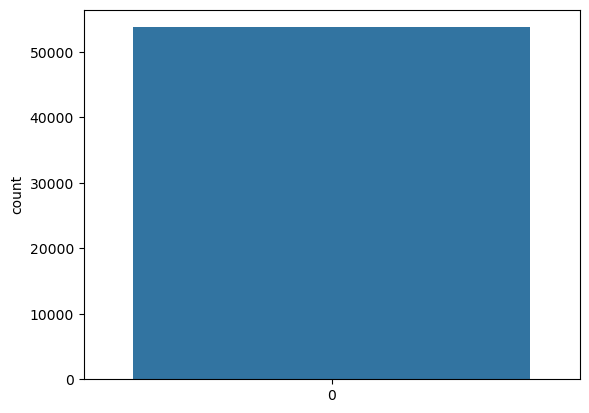

In [88]:
sns.countplot(trainy)

Model Bulding

As you can see this is Classification problem in this we have  catgerocial data present so we use Classification model here.

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


In [90]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=32)
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
acc=accuracy_score(y_test,pred)
print(accuracy_score(y_test,pred))

0.9090708938793483


In [91]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))


0.9087406428885954
[[7899  192]
 [ 637  356]]
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95      8091
         1.0       0.65      0.36      0.46       993

    accuracy                           0.91      9084
   macro avg       0.79      0.67      0.71      9084
weighted avg       0.90      0.91      0.90      9084



In [92]:
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))


0.9068692206076618
[[8008   83]
 [ 763  230]]
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95      8091
         1.0       0.73      0.23      0.35       993

    accuracy                           0.91      9084
   macro avg       0.82      0.61      0.65      9084
weighted avg       0.89      0.91      0.88      9084



In [93]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
predgb=gb.predict(x_test)
print(accuracy_score(y_test,predgb))
print(confusion_matrix(y_test,predgb))
print(classification_report(y_test,predgb))


0.9078599735799208
[[7902  189]
 [ 648  345]]
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      8091
         1.0       0.65      0.35      0.45       993

    accuracy                           0.91      9084
   macro avg       0.79      0.66      0.70      9084
weighted avg       0.89      0.91      0.90      9084



In [94]:
ac=AdaBoostClassifier()
ac.fit(x_train,y_train)
predac=ac.predict(x_test)
print(accuracy_score(y_test,predac))
print(confusion_matrix(y_test,predac))
print(classification_report(y_test,predac))


0.9032364597093792
[[7858  233]
 [ 646  347]]
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.95      8091
         1.0       0.60      0.35      0.44       993

    accuracy                           0.90      9084
   macro avg       0.76      0.66      0.69      9084
weighted avg       0.89      0.90      0.89      9084



In [95]:
bc=BaggingClassifier()
bc.fit(x_train,y_train)
predbc=bc.predict(x_test)
print(accuracy_score(y_test,predbc))
print(confusion_matrix(y_test,predbc))
print(classification_report(y_test,predbc))


0.9005944517833554
[[7815  276]
 [ 627  366]]
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95      8091
         1.0       0.57      0.37      0.45       993

    accuracy                           0.90      9084
   macro avg       0.75      0.67      0.70      9084
weighted avg       0.89      0.90      0.89      9084



In [96]:
et=ExtraTreesClassifier()
et.fit(x_train,y_train)
predet=et.predict(x_test)
print(accuracy_score(y_test,predet))
print(confusion_matrix(y_test,predet))
print(classification_report(y_test,predet))


0.9053280493174812
[[7943  148]
 [ 712  281]]
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      8091
         1.0       0.66      0.28      0.40       993

    accuracy                           0.91      9084
   macro avg       0.79      0.63      0.67      9084
weighted avg       0.89      0.91      0.89      9084



Now we can check cross valdiation of all the model.

In [97]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print('difference b/w Accuracy_score and cross_val_score is:',accuracy_score(y_test,predRFC)-score.mean())

[0.90620872 0.90901585 0.90404624 0.90999174 0.90371594]
0.9065956986103825
difference b/w Accuracy_score and cross_val_score is: 0.002144944278212879


In [98]:
score=cross_val_score(svc,x,y)
print(score)
print(score.mean())
print('difference b/w Accuracy_score and cross_val_score is:',accuracy_score(y_test,predsvc)-score.mean())

[0.90191546 0.90488771 0.89991742 0.90388109 0.90289017]
0.9026983714890038
difference b/w Accuracy_score and cross_val_score is: 0.00417084911865806


In [99]:
score=cross_val_score(gb,x,y)
print(score)
print(score.mean())
print('difference b/w Accuracy_score and cross_val_score is:',accuracy_score(y_test,predgb)-score.mean())

[0.90554822 0.90769485 0.9042114  0.90834021 0.90239472]
0.9056378780160287
difference b/w Accuracy_score and cross_val_score is: 0.002222095563892079


In [100]:
score=cross_val_score(ac,x,y)
print(score)
print(score.mean())
print('difference b/w Accuracy_score and cross_val_score is:',accuracy_score(y_test,predac)-score.mean())

[0.8996037  0.90472259 0.89710983 0.90305533 0.89909166]
0.9007166201060948
difference b/w Accuracy_score and cross_val_score is: 0.0025198396032843906


In [101]:
score=cross_val_score(bc,x,y)
print(score)
print(score.mean())
print('difference b/w Accuracy_score and cross_val_score is:',accuracy_score(y_test,predbc)-score.mean())

[0.89646631 0.89877807 0.89611891 0.90916598 0.9014038 ]
0.900386614553733
difference b/w Accuracy_score and cross_val_score is: 0.00020783722962236517


In [102]:
score=cross_val_score(et,x,y)
print(score)
print(score.mean())
print('difference b/w Accuracy_score and cross_val_score is:',accuracy_score(y_test,predet)-score.mean())

[0.90340159 0.90422721 0.90388109 0.90652353 0.90272502]
0.9041516885615893
difference b/w Accuracy_score and cross_val_score is: 0.001176360755891892


As we can see above all model Accuracy_score and crossval_score is less and score mean is 90% in RandomForestClassifier model so this is the best model.

Hyper parameter tunning

In [103]:
from sklearn.model_selection import GridSearchCV
param={'criterion':['gini', 'entropy', 'log_loss']}
gscv=GridSearchCV(RandomForestClassifier(),param,cv=5)
gscv.fit(x_train,y_train)
gscv.best_params_

{'criterion': 'log_loss'}

In [104]:
model1=RandomForestClassifier(criterion='entropy')
model1.fit(x_train,y_train)
pred=model1.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

90.8960810215764


In [105]:
model2=RandomForestClassifier(criterion='log_loss')
model2.fit(x_train,y_train)
pred=model2.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

90.8300308234258


In [106]:
fmodel=RandomForestClassifier(criterion='gini')
fmodel.fit(x_train,y_train)
pred=fmodel.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

91.09423161602818


Plotting Roc and AUC curve

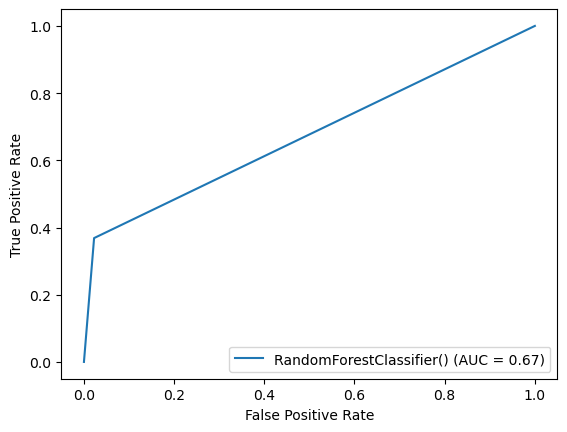

In [107]:
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr,tpr,thresholds =roc_curve(y_test,pred,pos_label=1)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=fmodel)
display.plot()

Save the model

In [108]:
import joblib
model=joblib.dump(fmodel,'Banksubsriber.pkl')

In [109]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_test.csv')

In [110]:
df

ID  age            job   marital  education default  balance  \
0      38441   32       services   married  secondary      no      118   
1      40403   78        retired  divorced    primary      no     2787   
2       3709   31  self-employed    single   tertiary      no      144   
3      37422   57       services    single    primary      no     3777   
4      12527   45    blue-collar  divorced  secondary      no     -705   
...      ...  ...            ...       ...        ...     ...      ...   
13559  23465   39     management   married   tertiary      no       45   
13560  11743   54    blue-collar   married    primary      no     2281   
13561  28292   35        retired   married    primary      no      285   
13562  45163   29         admin.    single  secondary      no      464   
13563  34839   29         admin.   married  secondary      no        2   

      housing loan    contact  day month  duration  campaign  pdays  previous  \
0         yes   no   cellular   15   may        20         6     -1         0   
1          no   no  telephone    1   jul       372         1     -1         0   
2         yes   no    unknown   16   may       676         1     -1         0   
3         yes   no  telephone   13   may        65         2     -1         0   
4          no  yes    unknown    3   jul       111         1     -1         0   
...       ...  ...        ...  ...   ...       ...       ...    ...       ...   
13559      no   no   cellular   28   aug       148         4     -1         0   
13560     yes   no    unknown   20   jun       158         1     -1         0   
13561     yes   no   cellular   29   jan       136         1     -1         0   
13562      no   no   cellular    9   nov       208         2     91         3   
13563     yes   no   cellular    6   may       339         1    362         1   

      poutcome  
0      unknown  
1      unknown  
2      unknown  
3      unknown  
4      unknown  
...        ...  
13559  unknown  
13560  unknown  
13561  unknown  
13562  success  
13563  failure  

[13564 rows x 17 columns]

In this test dataset contains both Numerical and Categorical data are present

EDA(Exploratory Data Analysis)

In [111]:
df.shape

(13564, 17)

This Test Dataset contains 13564 rows and 17 columns

In [112]:
df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [113]:
df.columns.tolist()

['ID',
 'age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome']

In [114]:
df.dtypes

ID            int64
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object

check the null values

In [115]:
df.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

As we can see there are no null values present in this dataset.

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


<Axes: >

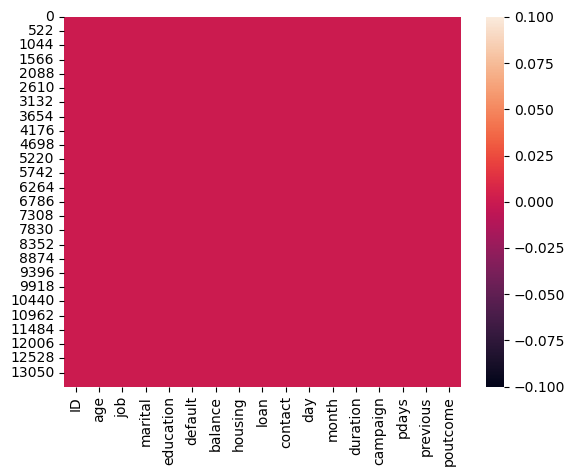

In [117]:
sns.heatmap(df.isnull())

As we can clearly visualize that there is no missing data present in the dataset.

Seperating Numerical and Categorical columns

In [118]:
cat=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat.append(i)
print('Catogerical_col:',cat)
print('\n')

Catogerical_col: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']




In [119]:
num=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        num.append(i)
print('Numerical_col:',num)
print('\n')

Numerical_col: ['ID', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']




checking the number of unique value in each column.

In [120]:
df.nunique().to_frame('Number of unique values')

Number of unique values
ID                           13564
age                             75
job                             12
marital                          3
education                        4
default                          2
balance                       4292
housing                          2
loan                             2
contact                          3
day                             31
month                           12
duration                      1201
campaign                        40
pdays                          422
previous                        33
poutcome                         4

These are the unique values present in the datset here ID column has the dat of maximum unique id to which can be dropped.

In [121]:
df.drop('ID',axis=1,inplace=True)

In [122]:
df.head()

age            job   marital  education default  balance housing loan  \
0   32       services   married  secondary      no      118     yes   no   
1   78        retired  divorced    primary      no     2787      no   no   
2   31  self-employed    single   tertiary      no      144     yes   no   
3   57       services    single    primary      no     3777     yes   no   
4   45    blue-collar  divorced  secondary      no     -705      no  yes   

     contact  day month  duration  campaign  pdays  previous poutcome  
0   cellular   15   may        20         6     -1         0  unknown  
1  telephone    1   jul       372         1     -1         0  unknown  
2    unknown   16   may       676         1     -1         0  unknown  
3  telephone   13   may        65         2     -1         0  unknown  
4    unknown    3   jul       111         1     -1         0  unknown

Description of Dataset. Here it gives Statistical summary of Numerical columns.

In [123]:
df.describe()

age       balance           day      duration      campaign  \
count  13564.000000  13564.000000  13564.000000  13564.000000  13564.000000   
mean      40.887128   1358.496535     15.738646    258.278679      2.759510   
std       10.604108   3082.940623      8.288174    258.488648      3.060928   
min       18.000000  -3313.000000      1.000000      0.000000      1.000000   
25%       33.000000     71.000000      8.000000    102.000000      1.000000   
50%       39.000000    445.000000     16.000000    180.000000      2.000000   
75%       48.000000   1413.250000     21.000000    319.000000      3.000000   
max       95.000000  98417.000000     31.000000   3253.000000     58.000000   

              pdays      previous  
count  13564.000000  13564.000000  
mean      41.648555      0.594441  
std      101.985178      1.998193  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      850.000000     55.000000

This is the Staststical information of the numerical columns.This summary of the dataset looks perfect.since there is no negative /invalid values present. here mean value is greater than median so right skewness present in the dataset. and 75% and Max values there is huge difference hence outliers are present in the datase

Data Visualization

32    628
34    609
35    580
31    579
33    566
     ... 
95      1
86      1
92      1
89      1
90      1
Name: age, Length: 75, dtype: int64


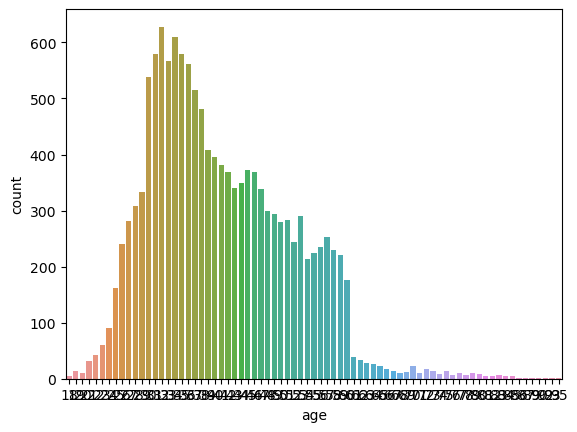

In [124]:
ux=sns.countplot(x='age',data=df)
print(df['age'].value_counts())
plt.show()

blue-collar      2890
management       2819
technician       2290
admin.           1540
services         1251
retired           690
entrepreneur      479
self-employed     456
unemployed        398
housemaid         366
student           303
unknown            82
Name: job, dtype: int64


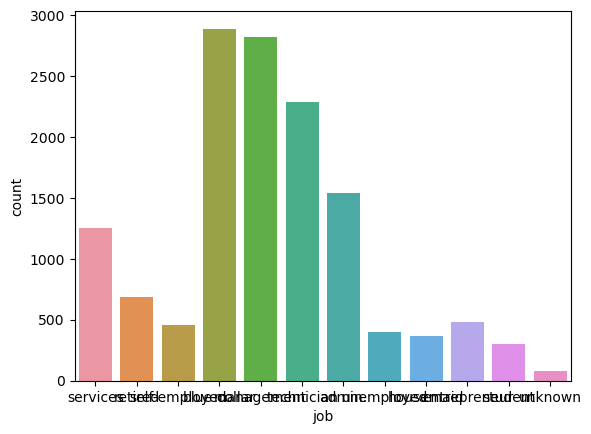

In [125]:
ux=sns.countplot(x='job',data=df)
print(df['job'].value_counts())
plt.show()

married     8119
single      3868
divorced    1577
Name: marital, dtype: int64


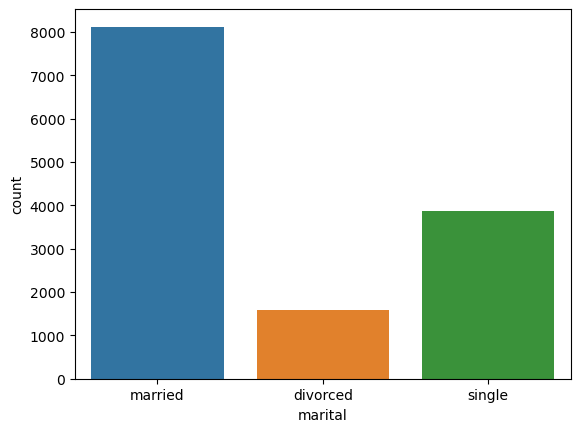

In [126]:
ux=sns.countplot(x='marital',data=df)
print(df['marital'].value_counts())
plt.show()

secondary    6978
tertiary     4000
primary      2043
unknown       543
Name: education, dtype: int64


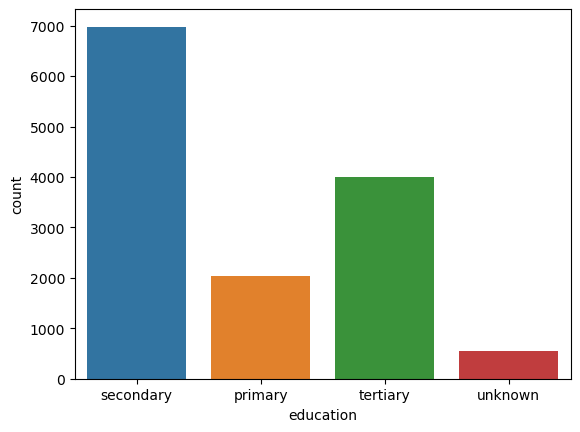

In [127]:
ux=sns.countplot(x='education',data=df)
print(df['education'].value_counts())
plt.show()

no     13334
yes      230
Name: default, dtype: int64


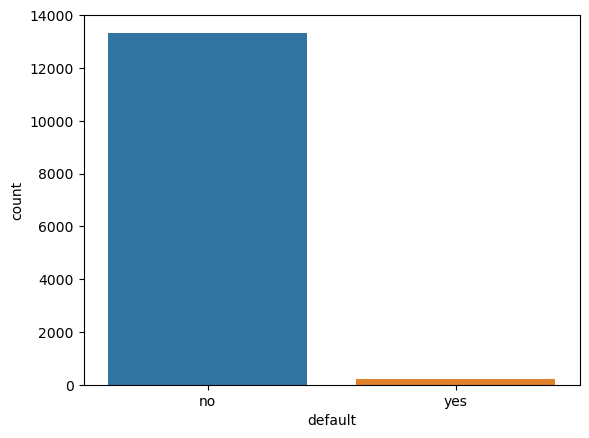

In [128]:
ux=sns.countplot(x='default',data=df)
print(df['default'].value_counts())
plt.show()

 0       1044
 1         58
 2         47
 3         46
 4         44
         ... 
-140        1
 6495       1
 8180       1
 3684       1
 4256       1
Name: balance, Length: 4292, dtype: int64


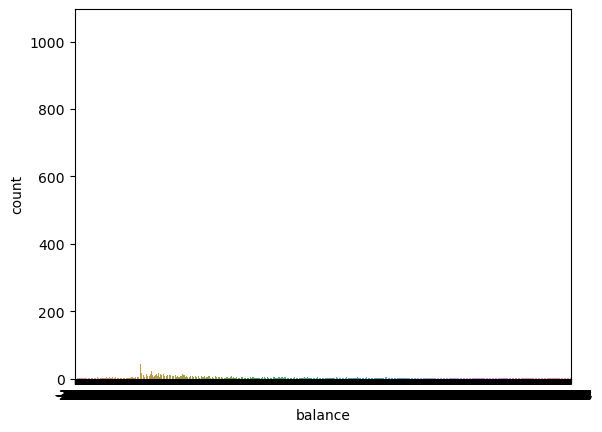

In [129]:
ux=sns.countplot(x='balance',data=df)
print(df['balance'].value_counts())
plt.show()

yes    7546
no     6018
Name: housing, dtype: int64


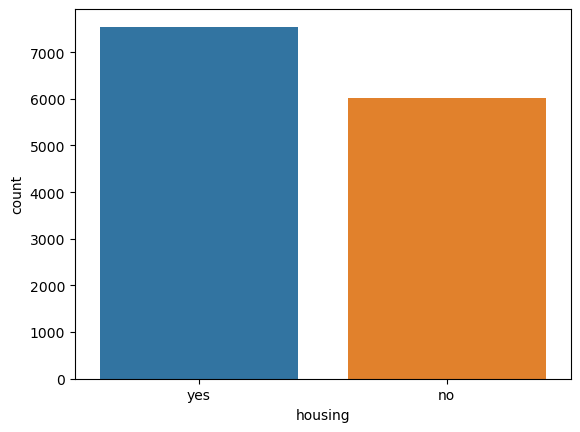

In [130]:
ux=sns.countplot(x='housing',data=df)
print(df['housing'].value_counts())
plt.show()

no     11451
yes     2113
Name: loan, dtype: int64


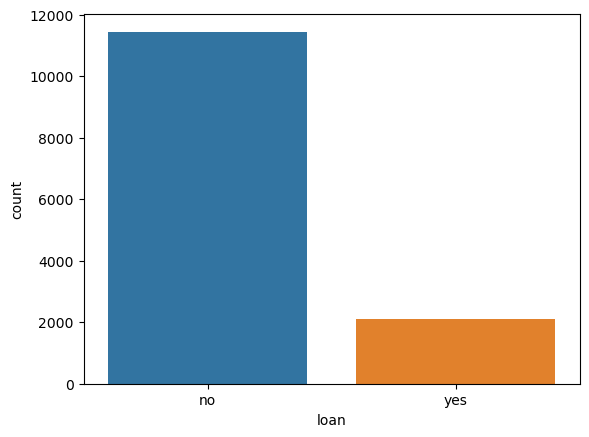

In [131]:
ux=sns.countplot(x='loan',data=df)
print(df['loan'].value_counts())
plt.show()

cellular     8862
unknown      3843
telephone     859
Name: contact, dtype: int64


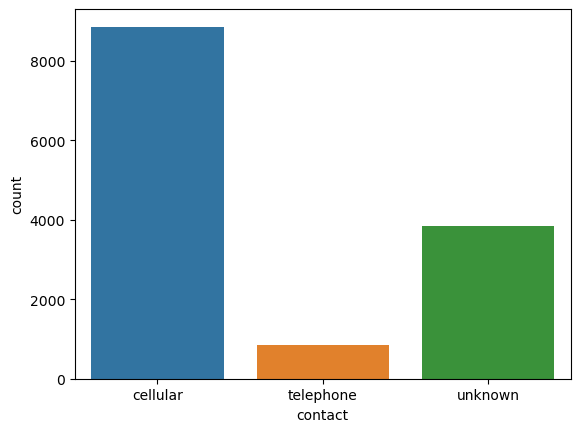

In [132]:
ux=sns.countplot(x='contact',data=df)
print(df['contact'].value_counts())
plt.show()

20    843
18    696
17    595
6     584
21    581
7     577
14    565
8     561
28    554
5     537
19    529
29    504
15    495
12    487
13    486
30    484
11    465
9     464
16    434
4     429
2     393
3     318
27    317
23    282
26    274
22    265
25    254
31    183
10    164
24    142
1     102
Name: day, dtype: int64


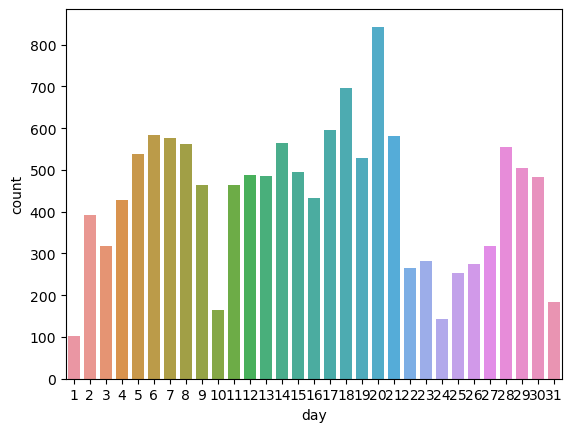

In [133]:
ux=sns.countplot(x='day',data=df)
print(df['day'].value_counts())
plt.show()

may    4097
jul    2051
aug    1914
jun    1603
nov    1187
apr     877
feb     822
jan     426
oct     226
sep     169
mar     135
dec      57
Name: month, dtype: int64


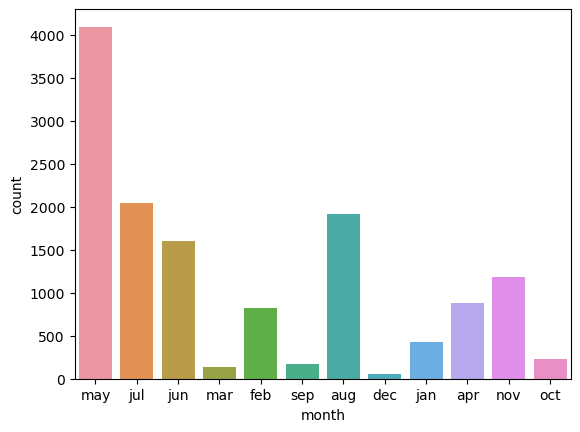

In [134]:
ux=sns.countplot(x='month',data=df)
print(df['month'].value_counts())
plt.show()

91      63
95      62
73      61
151     60
92      59
        ..
572      1
799      1
1170     1
3253     1
881      1
Name: duration, Length: 1201, dtype: int64


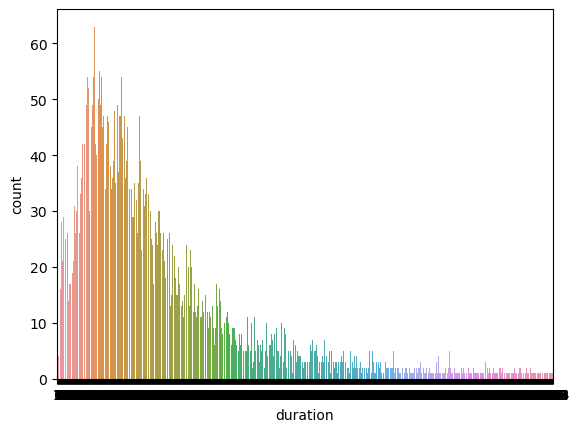

In [135]:
ux=sns.countplot(x='duration',data=df)
print(df['duration'].value_counts())
plt.show()

1     5282
2     3707
3     1663
4     1080
5      519
6      375
7      217
8      184
9       91
10      82
11      75
12      53
13      40
16      25
14      25
15      23
17      17
21      16
18      14
19      14
23       9
24       7
20       6
22       5
25       5
29       4
26       4
36       3
31       3
32       3
27       2
28       2
30       2
50       1
33       1
46       1
41       1
58       1
35       1
51       1
Name: campaign, dtype: int64


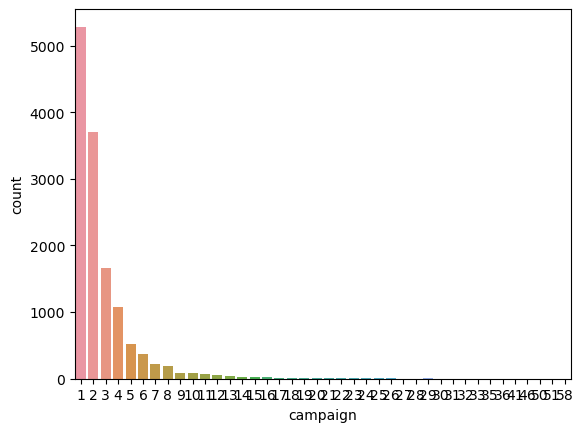

In [136]:
ux=sns.countplot(x='campaign',data=df)
print(df['campaign'].value_counts())
plt.show()

-1      11030
 182       49
 92        47
 181       42
 183       41
        ...  
 378        1
 3          1
 34         1
 215        1
 163        1
Name: pdays, Length: 422, dtype: int64


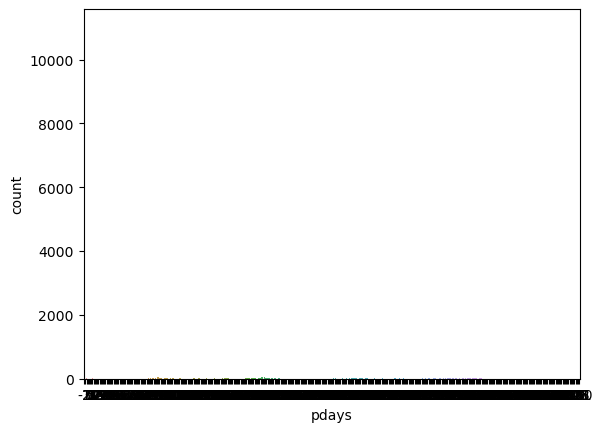

In [137]:
ux=sns.countplot(x='pdays',data=df)
print(df['pdays'].value_counts())
plt.show()

0     11030
1       851
2       625
3       362
4       213
5       148
6        89
7        67
8        48
9        28
11       19
10       18
12       14
13        8
14        5
16        5
15        5
17        4
24        3
19        3
20        3
30        2
23        2
22        2
29        2
27        1
51        1
40        1
38        1
28        1
18        1
55        1
37        1
Name: previous, dtype: int64


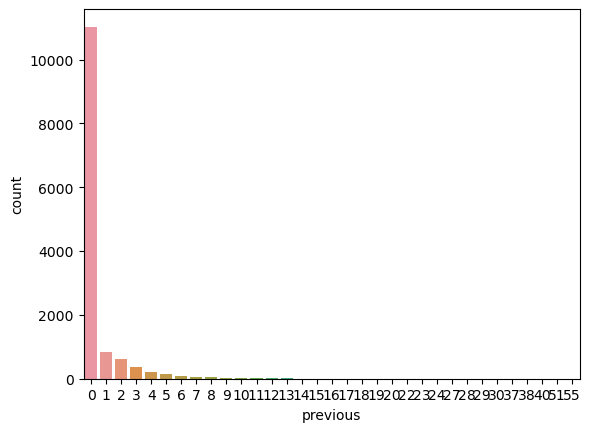

In [138]:
ux=sns.countplot(x='previous',data=df)
print(df['previous'].value_counts())
plt.show()

unknown    11030
failure     1539
other        552
success      443
Name: poutcome, dtype: int64


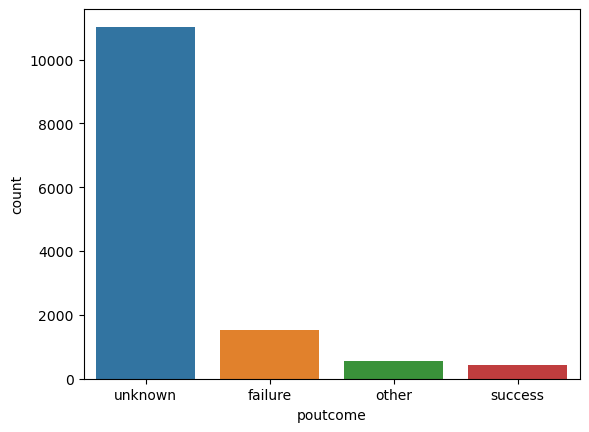

In [139]:
ux=sns.countplot(x='poutcome',data=df)
print(df['poutcome'].value_counts())
plt.show()

Multivariate Analysis --->here we consider more than 2 features to visualize the data.

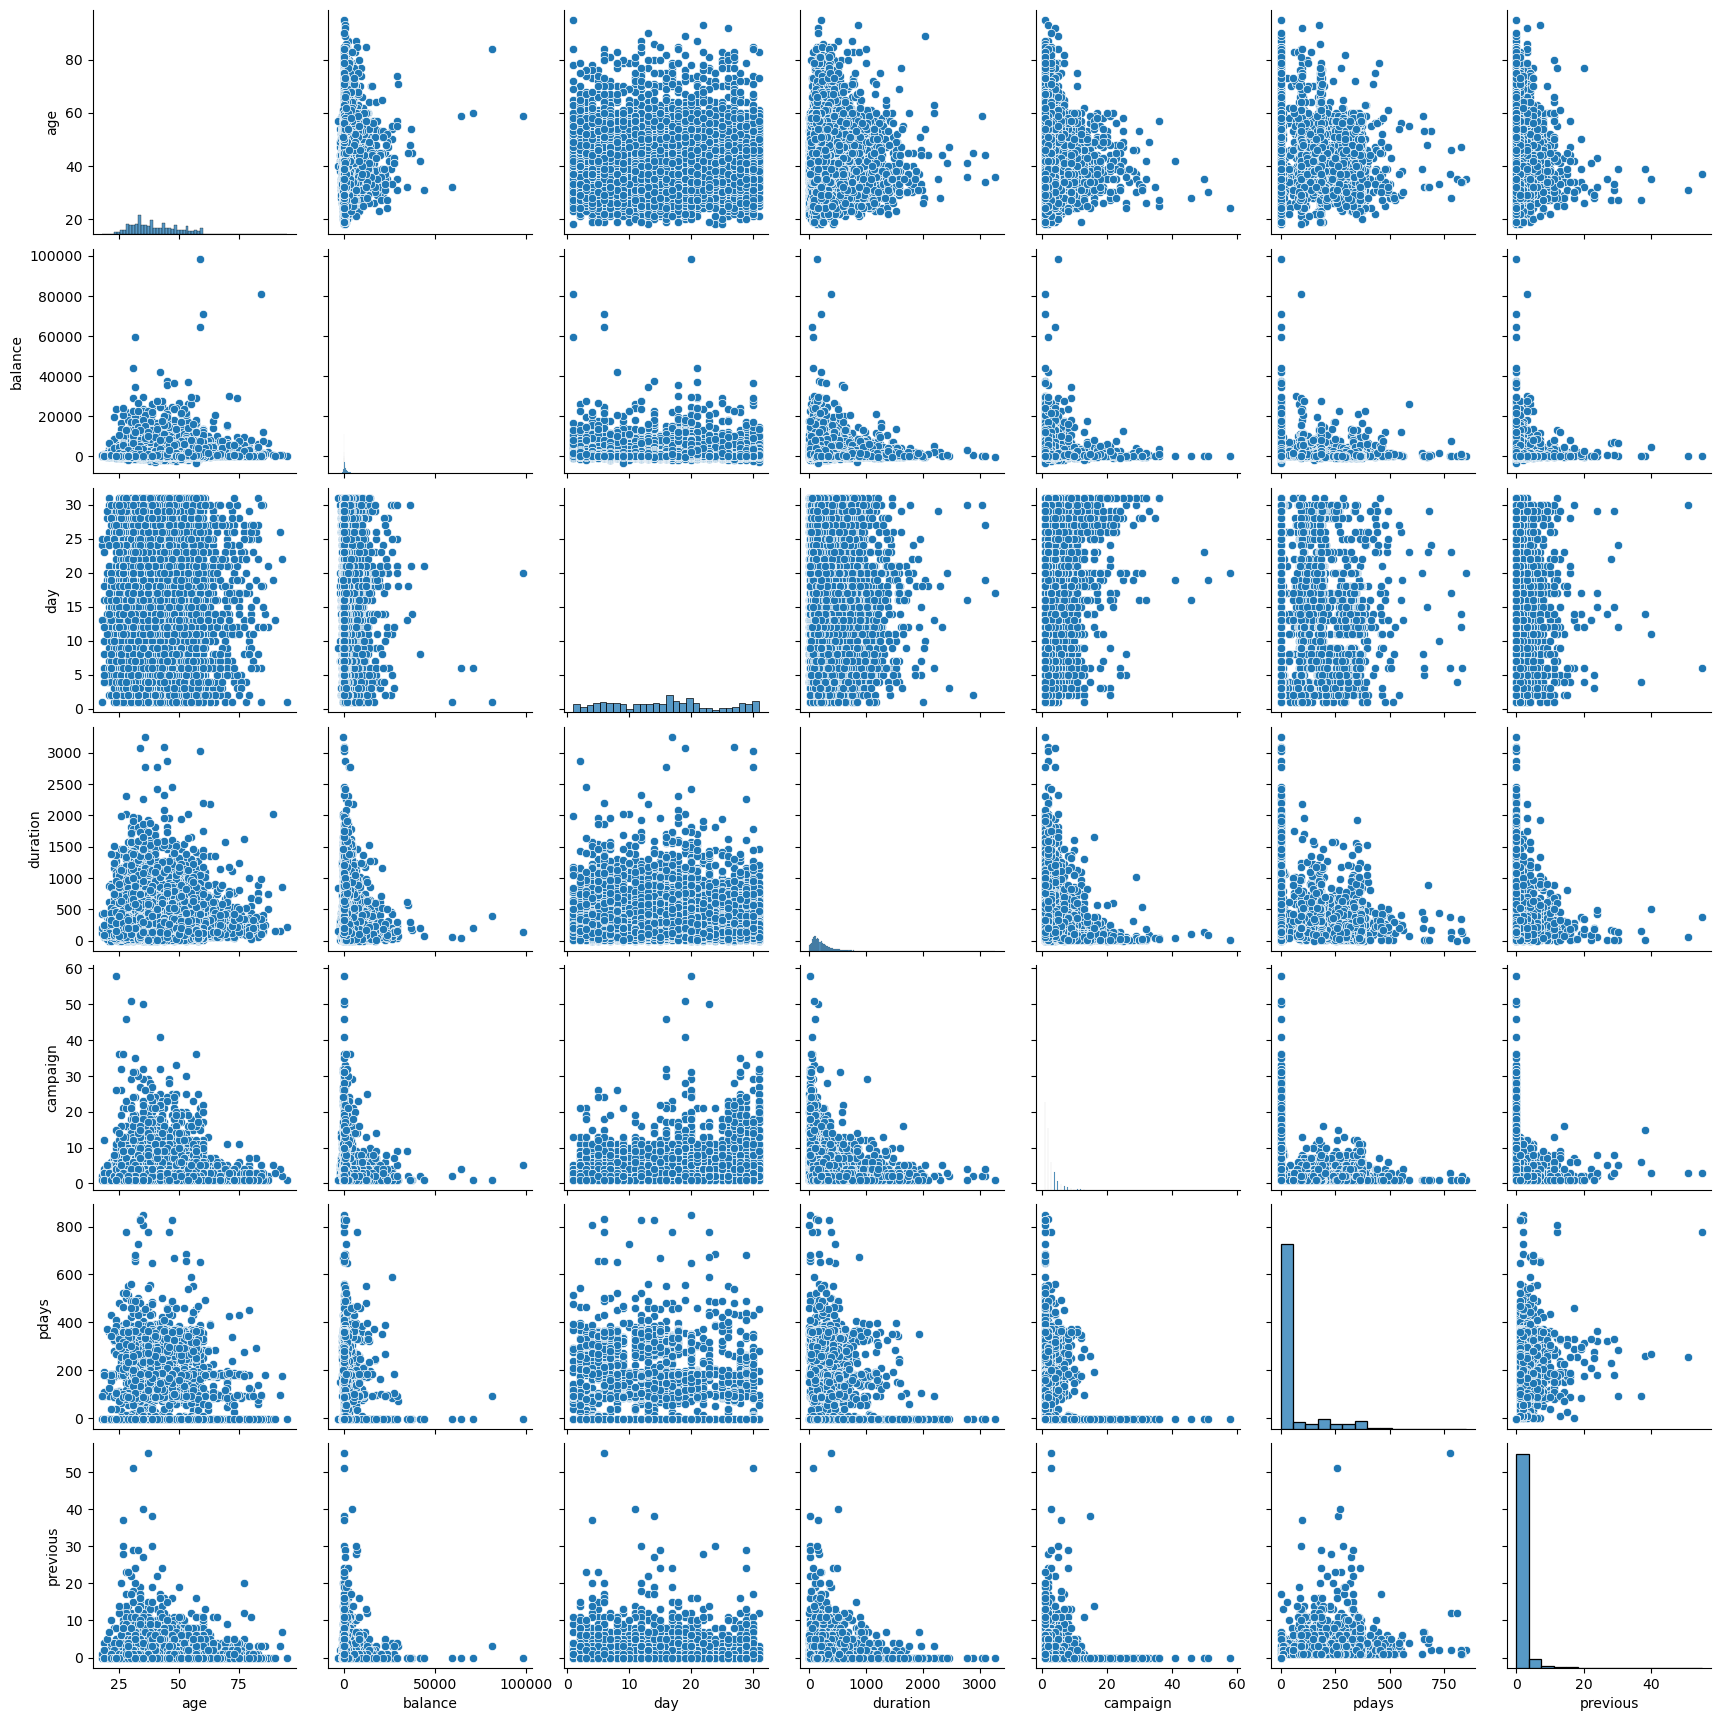

In [140]:
sns.pairplot(df)
plt.show()


Encoding technique (here we are using encoding method to change categorical data to numerical data.)

In [141]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=oe.fit_transform(df[i].values.reshape(-1,1))
        df

In [142]:
df

age  job  marital  education  default  balance  housing  loan  contact  \
0       32  7.0      1.0        1.0      0.0      118      1.0   0.0      0.0   
1       78  5.0      0.0        0.0      0.0     2787      0.0   0.0      1.0   
2       31  6.0      2.0        2.0      0.0      144      1.0   0.0      2.0   
3       57  7.0      2.0        0.0      0.0     3777      1.0   0.0      1.0   
4       45  1.0      0.0        1.0      0.0     -705      0.0   1.0      2.0   
...    ...  ...      ...        ...      ...      ...      ...   ...      ...   
13559   39  4.0      1.0        2.0      0.0       45      0.0   0.0      0.0   
13560   54  1.0      1.0        0.0      0.0     2281      1.0   0.0      2.0   
13561   35  5.0      1.0        0.0      0.0      285      1.0   0.0      0.0   
13562   29  0.0      2.0        1.0      0.0      464      0.0   0.0      0.0   
13563   29  0.0      1.0        1.0      0.0        2      1.0   0.0      0.0   

       day  month  duration  campaign  pdays  previous  poutcome  
0       15    8.0        20         6     -1         0       3.0  
1        1    5.0       372         1     -1         0       3.0  
2       16    8.0       676         1     -1         0       3.0  
3       13    8.0        65         2     -1         0       3.0  
4        3    5.0       111         1     -1         0       3.0  
...    ...    ...       ...       ...    ...       ...       ...  
13559   28    1.0       148         4     -1         0       3.0  
13560   20    6.0       158         1     -1         0       3.0  
13561   29    4.0       136         1     -1         0       3.0  
13562    9    9.0       208         2     91         3       2.0  
13563    6    8.0       339         1    362         1       0.0  

[13564 rows x 16 columns]

age              Axes(0.125,0.77;0.227941x0.11)
job           Axes(0.398529,0.77;0.227941x0.11)
marital       Axes(0.672059,0.77;0.227941x0.11)
education       Axes(0.125,0.638;0.227941x0.11)
default      Axes(0.398529,0.638;0.227941x0.11)
balance      Axes(0.672059,0.638;0.227941x0.11)
housing         Axes(0.125,0.506;0.227941x0.11)
loan         Axes(0.398529,0.506;0.227941x0.11)
contact      Axes(0.672059,0.506;0.227941x0.11)
day             Axes(0.125,0.374;0.227941x0.11)
month        Axes(0.398529,0.374;0.227941x0.11)
duration     Axes(0.672059,0.374;0.227941x0.11)
campaign        Axes(0.125,0.242;0.227941x0.11)
pdays        Axes(0.398529,0.242;0.227941x0.11)
previous     Axes(0.672059,0.242;0.227941x0.11)
poutcome         Axes(0.125,0.11;0.227941x0.11)
dtype: object

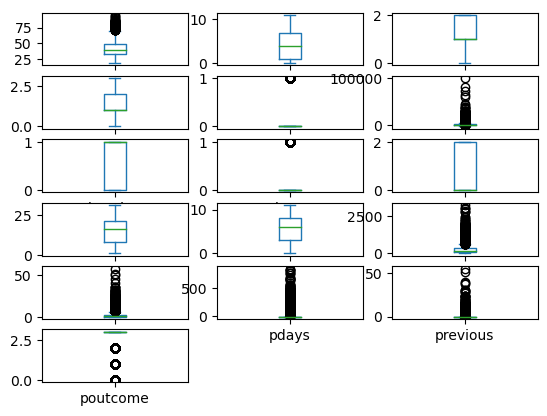

In [143]:
df.plot(kind='box',subplots=True,layout=(6,3))

Checking Skewness

In [144]:
df.skew()

age          0.692404
job          0.254647
marital     -0.109220
education    0.192137
default      7.483552
balance      9.165015
housing     -0.226771
loan         1.898587
contact      0.794849
day          0.106806
month       -0.465848
duration     3.017221
campaign     4.958236
pdays        2.555601
previous     8.704583
poutcome    -1.921847
dtype: float64

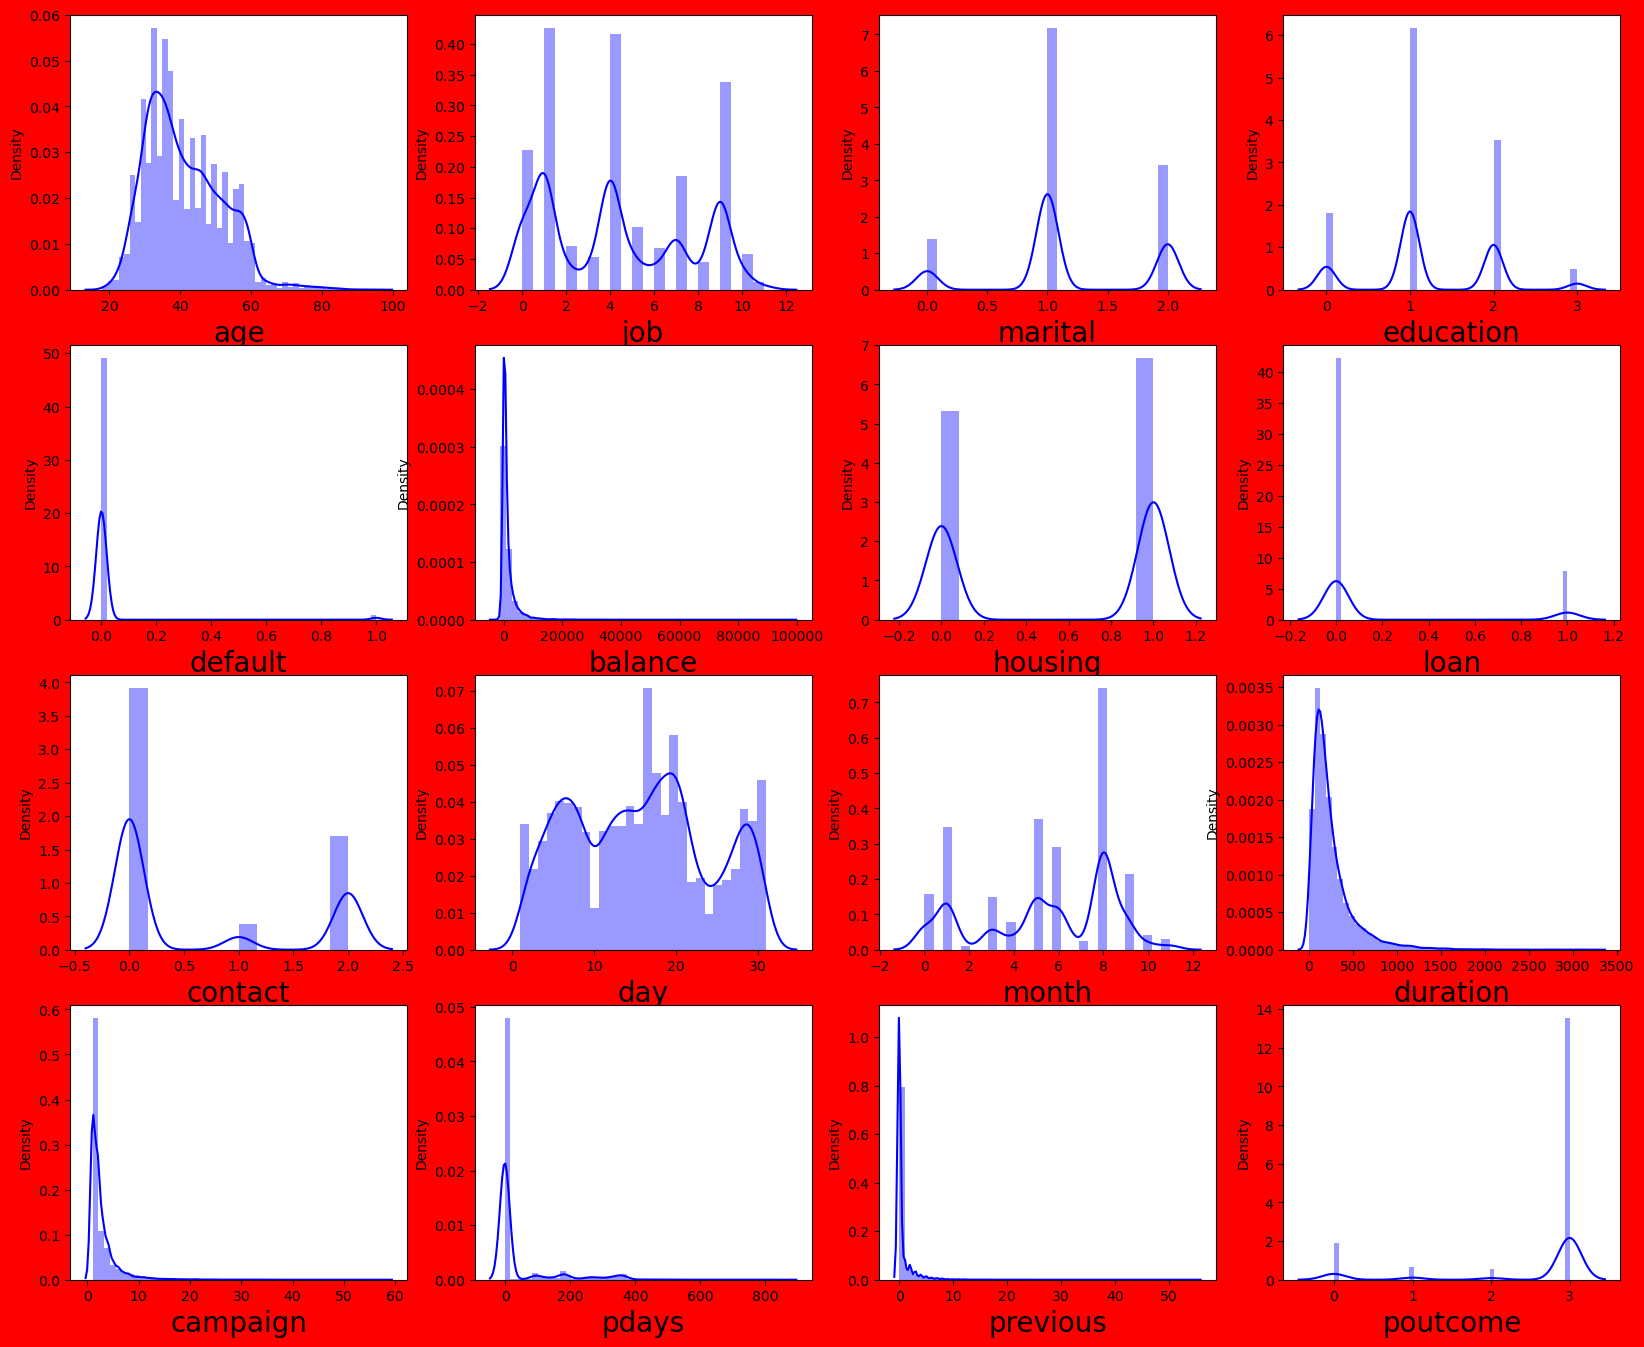

In [145]:
plt.figure(figsize=(20,25),facecolor='red')
num=1
for column in df:
    if num<=18:
        ax=plt.subplot(6,4,num)
        sns.distplot(df[column],color='b')
        plt.xlabel(column,fontsize=20)
        
    num+=1
plt.show()

Here we are checking the skewness of the data.as you see above default,balance,campaign,pdays,previous,duration,loan,poutcome,have skewness here we are using squareroot and cuberoot method to remove the skewness.

In [146]:
df['previous']=np.sqrt(df['previous'])

In [147]:
df['default']=np.sqrt(df['default'])

In [148]:
df.skew()

age          0.692404
job          0.254647
marital     -0.109220
education    0.192137
default      7.483552
balance      9.165015
housing     -0.226771
loan         1.898587
contact      0.794849
day          0.106806
month       -0.465848
duration     3.017221
campaign     4.958236
pdays        2.555601
previous     2.658009
poutcome    -1.921847
dtype: float64

In [149]:
df['default']=np.cbrt(df['default'])

In [150]:
df['balance']=np.cbrt(df['balance'])

In [151]:
df['loan']=np.cbrt(df['loan'])

In [152]:
df['duration']=np.cbrt(df['duration'])

In [153]:
df['campaign']=np.cbrt(df['campaign'])

In [154]:
df.skew()

age          0.692404
job          0.254647
marital     -0.109220
education    0.192137
default      7.483552
balance     -0.059591
housing     -0.226771
loan         1.898587
contact      0.794849
day          0.106806
month       -0.465848
duration     0.624285
campaign     1.618080
pdays        2.555601
previous     2.658009
poutcome    -1.921847
dtype: float64

In [155]:
df['pdays']=np.cbrt(df['pdays'])

In [156]:
df.skew()

age          0.692404
job          0.254647
marital     -0.109220
education    0.192137
default      7.483552
balance     -0.059591
housing     -0.226771
loan         1.898587
contact      0.794849
day          0.106806
month       -0.465848
duration     0.624285
campaign     1.618080
pdays        1.722786
previous     2.658009
poutcome    -1.921847
dtype: float64

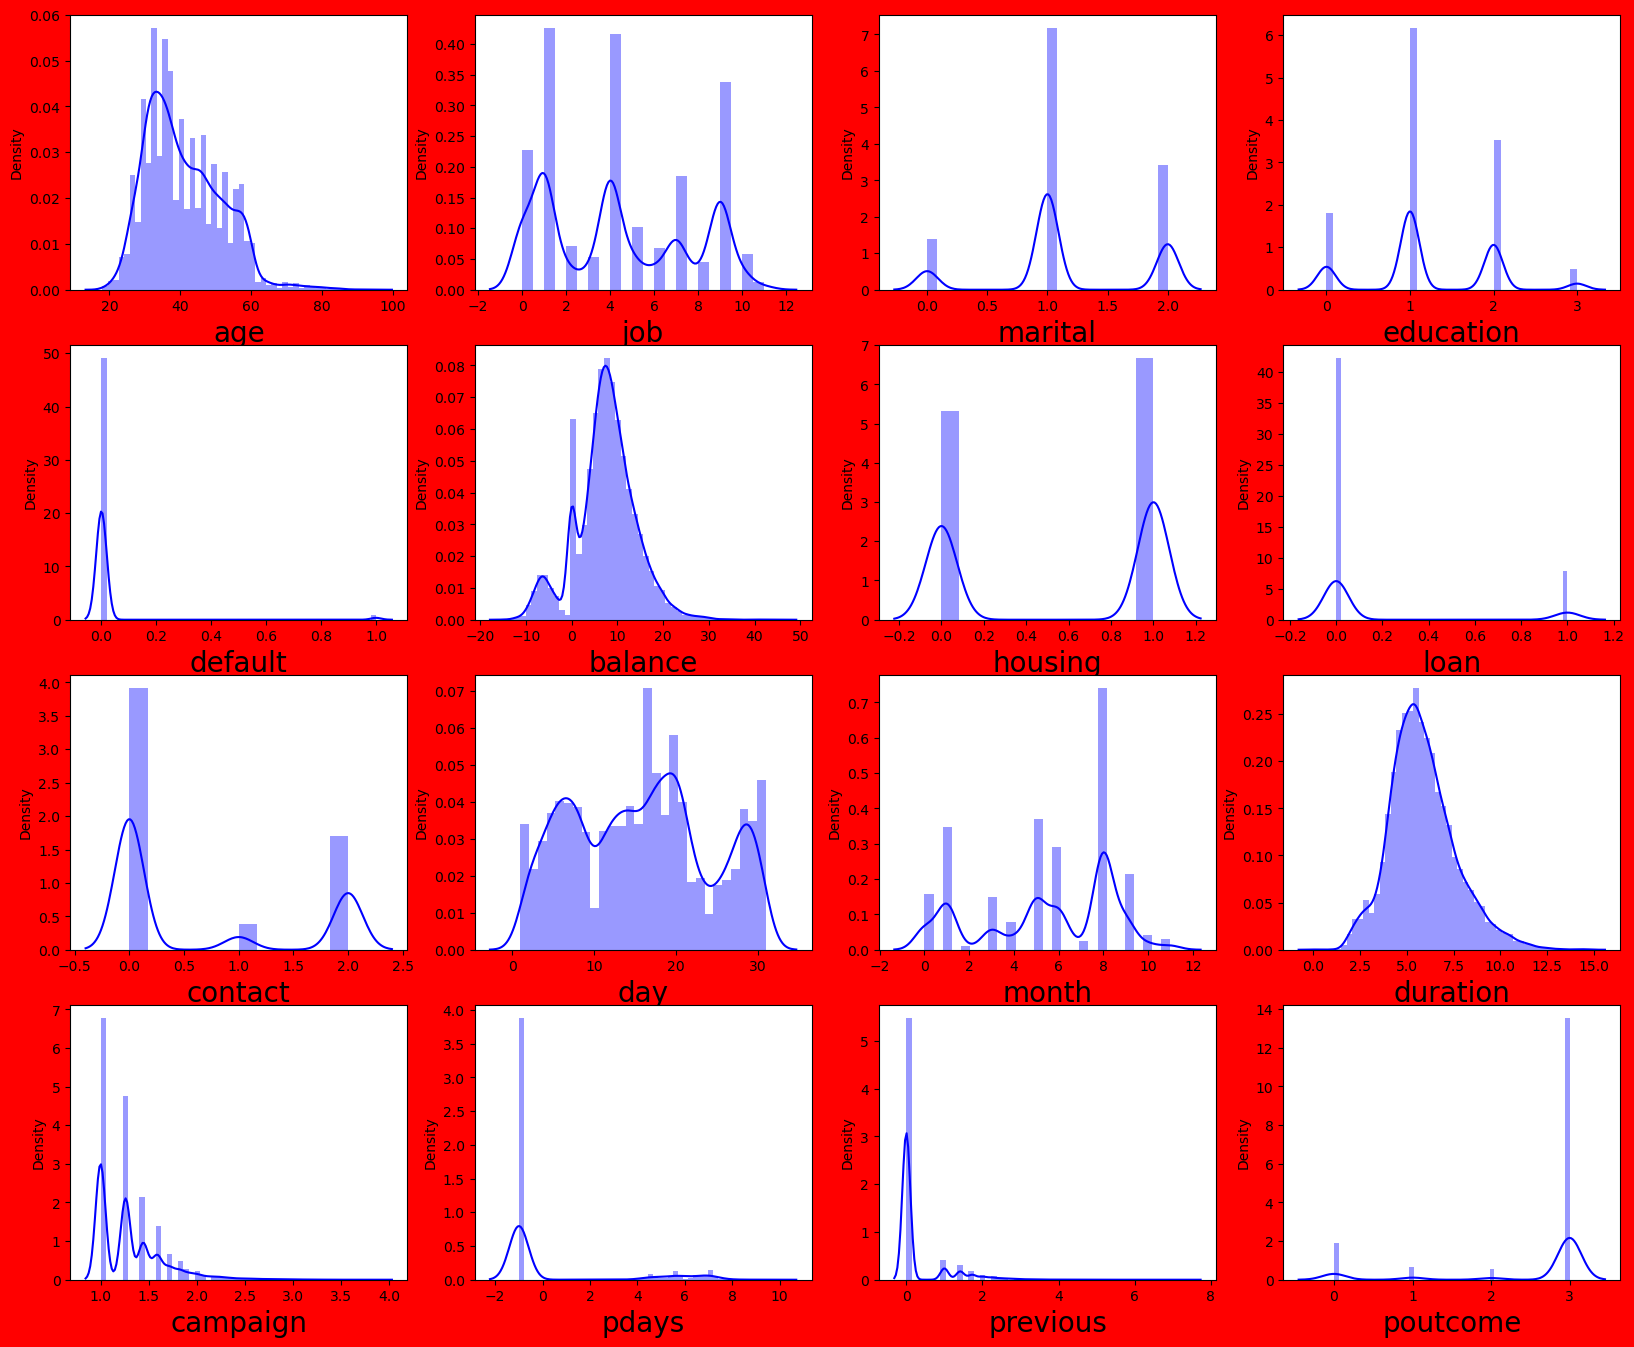

In [157]:
plt.figure(figsize=(20,25),facecolor='red')
num=1
for column in df:
    if num<=18:
        ax=plt.subplot(6,4,num)
        sns.distplot(df[column],color='b')
        plt.xlabel(column,fontsize=20)
        
    num+=1
plt.show()

In [158]:
df.shape

(13564, 16)

In [159]:
from scipy.stats import zscore
out_features=df[['age','default','balance','loan','duration','campaign','pdays','previous','poutcome']]
z=np.abs(zscore(out_features))
z

age   default   balance      loan  duration  campaign     pdays  \
0      0.838114  0.131336  0.388757  0.429564  1.770139  1.476242  0.471159   
1      3.499987  0.131336  1.009579  0.429564  0.760054  0.876872  0.471159   
2      0.932421  0.131336  0.337414  0.429564  1.655383  0.876872  0.471159   
3      1.519549  0.131336  1.238460  0.429564  1.031965  0.128360  0.471159   
4      0.387871  0.131336  2.494370  2.327941  0.588278  0.876872  0.471159   
...         ...       ...       ...       ...       ...       ...       ...   
13559  0.177969  0.131336  0.594357  0.429564  0.314959  0.814705  0.471159   
13560  1.236630  0.131336  0.870912  0.429564  0.249100  0.876872  0.471159   
13561  0.555195  0.131336  0.133128  0.429564  0.398032  0.876872  0.471159   
13562  1.121034  0.131336  0.043941  0.429564  0.044106  0.128360  1.540335   
13563  1.121034  0.131336  0.944704  0.429564  0.636140  0.876872  2.502187   

       previous  poutcome  
0      0.430532  0.452163  
1      0.430532  0.452163  
2      0.430532  0.452163  
3      0.430532  0.452163  
4      0.430532  0.452163  
...         ...       ...  
13559  0.430532  0.452163  
13560  0.430532  0.452163  
13561  0.430532  0.452163  
13562  2.015324  0.542830  
13563  0.981584  2.532817  

[13564 rows x 9 columns]

In [160]:
threshold=3
np.where(z>3)

(array([    1,    28,    52, ..., 13529, 13550, 13555], dtype=int64),
 array([0, 1, 7, ..., 1, 4, 5], dtype=int64))

In [161]:
df1=df[(z<3).all(axis=1)]

In [162]:
df1.shape

(12493, 16)

In [163]:
print('old dataframe:',df.shape[0])
print('new dataframe:',df1.shape[0])

old dataframe: 13564
new dataframe: 12493


In [164]:
print('datalosspercentage:',((df.shape[0]-df1.shape[0])/df.shape[0])*100)

datalosspercentage: 7.895900914184606


In [165]:
df1

age  job  marital  education  default    balance  housing  loan  \
0       32  7.0      1.0        1.0      0.0   4.904868      1.0   0.0   
2       31  6.0      2.0        2.0      0.0   5.241483      1.0   0.0   
3       57  7.0      2.0        0.0      0.0  15.573360      1.0   0.0   
4       45  1.0      0.0        1.0      0.0  -8.900130      0.0   1.0   
5       32  4.0      2.0        2.0      0.0   0.000000      1.0   0.0   
...    ...  ...      ...        ...      ...        ...      ...   ...   
13559   39  4.0      1.0        2.0      0.0   3.556893      0.0   0.0   
13560   54  1.0      1.0        0.0      0.0  13.163613      1.0   0.0   
13561   35  5.0      1.0        0.0      0.0   6.580844      1.0   0.0   
13562   29  0.0      2.0        1.0      0.0   7.741753      0.0   0.0   
13563   29  0.0      1.0        1.0      0.0   1.259921      1.0   0.0   

       contact  day  month  duration  campaign     pdays  previous  poutcome  
0          0.0   15    8.0  2.714418  1.817121 -1.000000  0.000000       3.0  
2          2.0   16    8.0  8.776383  1.000000 -1.000000  0.000000       3.0  
3          1.0   13    8.0  4.020726  1.259921 -1.000000  0.000000       3.0  
4          2.0    3    5.0  4.805896  1.000000 -1.000000  0.000000       3.0  
5          0.0   22    5.0  7.691372  1.259921 -1.000000  0.000000       3.0  
...        ...  ...    ...       ...       ...       ...       ...       ...  
13559      0.0   28    1.0  5.289572  1.587401 -1.000000  0.000000       3.0  
13560      2.0   20    6.0  5.406120  1.000000 -1.000000  0.000000       3.0  
13561      0.0   29    4.0  5.142563  1.000000 -1.000000  0.000000       3.0  
13562      0.0    9    9.0  5.924992  1.259921  4.497941  1.732051       2.0  
13563      0.0    6    8.0  6.972683  1.000000  7.126936  1.000000       0.0  

[12493 rows x 16 columns]

Checking the Correlation b/w Target variable and Independent variable.

In [166]:
df.corr()

age       job   marital  education   default   balance  \
age        1.000000 -0.024413 -0.396771  -0.117274 -0.022243  0.100216   
job       -0.024413  1.000000  0.052579   0.158185 -0.010780  0.021025   
marital   -0.396771  0.052579  1.000000   0.110982 -0.000793  0.025875   
education -0.117274  0.158185  0.110982   1.000000 -0.020382  0.069535   
default   -0.022243 -0.010780 -0.000793  -0.020382  1.000000 -0.180709   
balance    0.100216  0.021025  0.025875   0.069535 -0.180709  1.000000   
housing   -0.189573 -0.125409 -0.012039  -0.080032  0.008097 -0.095415   
loan      -0.022863 -0.018603 -0.059223  -0.054845  0.066402 -0.149953   
contact    0.024945 -0.090929 -0.036893  -0.108417  0.018585 -0.048099   
day       -0.004622  0.027381  0.000419   0.033917  0.007931 -0.005985   
month     -0.051712 -0.100924 -0.014271  -0.060441  0.027885 -0.006737   
duration  -0.002648  0.010145  0.008045  -0.001911 -0.007800  0.037281   
campaign   0.014792  0.021010 -0.015295   0.008466  0.013388 -0.031497   
pdays     -0.009111 -0.014309  0.017896   0.021949 -0.037401  0.061390   
previous  -0.002442  0.000147  0.019328   0.032309 -0.035641  0.069220   
poutcome   0.009334  0.020020 -0.010196  -0.020194  0.034386 -0.054635   

            housing      loan   contact       day     month  duration  \
age       -0.189573 -0.022863  0.024945 -0.004622 -0.051712 -0.002648   
job       -0.125409 -0.018603 -0.090929  0.027381 -0.100924  0.010145   
marital   -0.012039 -0.059223 -0.036893  0.000419 -0.014271  0.008045   
education -0.080032 -0.054845 -0.108417  0.033917 -0.060441 -0.001911   
default    0.008097  0.066402  0.018585  0.007931  0.027885 -0.007800   
balance   -0.095415 -0.149953 -0.048099 -0.005985 -0.006737  0.037281   
housing    1.000000  0.053394  0.171775 -0.033407  0.271594  0.006402   
loan       0.053394  1.000000 -0.015035  0.003121  0.017189 -0.012733   
contact    0.171775 -0.015035  1.000000 -0.030176  0.356889 -0.047536   
day       -0.033407  0.003121 -0.030176  1.000000 -0.018811 -0.042364   
month      0.271594  0.017189  0.356889 -0.018811  1.000000  0.003493   
duration   0.006402 -0.012733 -0.047536 -0.042364  0.003493  1.000000   
campaign  -0.039102  0.004450  0.005740  0.173947 -0.149786 -0.157262   
pdays      0.105705 -0.035873 -0.281455 -0.104966  0.043228  0.013595   
previous   0.068134 -0.030660 -0.252372 -0.089649  0.041695  0.013585   
poutcome  -0.116616  0.025735  0.272425  0.096803 -0.041551  0.004648   

           campaign     pdays  previous  poutcome  
age        0.014792 -0.009111 -0.002442  0.009334  
job        0.021010 -0.014309  0.000147  0.020020  
marital   -0.015295  0.017896  0.019328 -0.010196  
education  0.008466  0.021949  0.032309 -0.020194  
default    0.013388 -0.037401 -0.035641  0.034386  
balance   -0.031497  0.061390  0.069220 -0.054635  
housing   -0.039102  0.105705  0.068134 -0.116616  
loan       0.004450 -0.035873 -0.030660  0.025735  
contact    0.005740 -0.281455 -0.252372  0.272425  
day        0.173947 -0.104966 -0.089649  0.096803  
month     -0.149786  0.043228  0.041695 -0.041551  
duration  -0.157262  0.013595  0.013585  0.004648  
campaign   1.000000 -0.122653 -0.085925  0.120865  
pdays     -0.122653  1.000000  0.878252 -0.941739  
previous  -0.085925  0.878252  1.000000 -0.836856  
poutcome   0.120865 -0.941739 -0.836856  1.000000

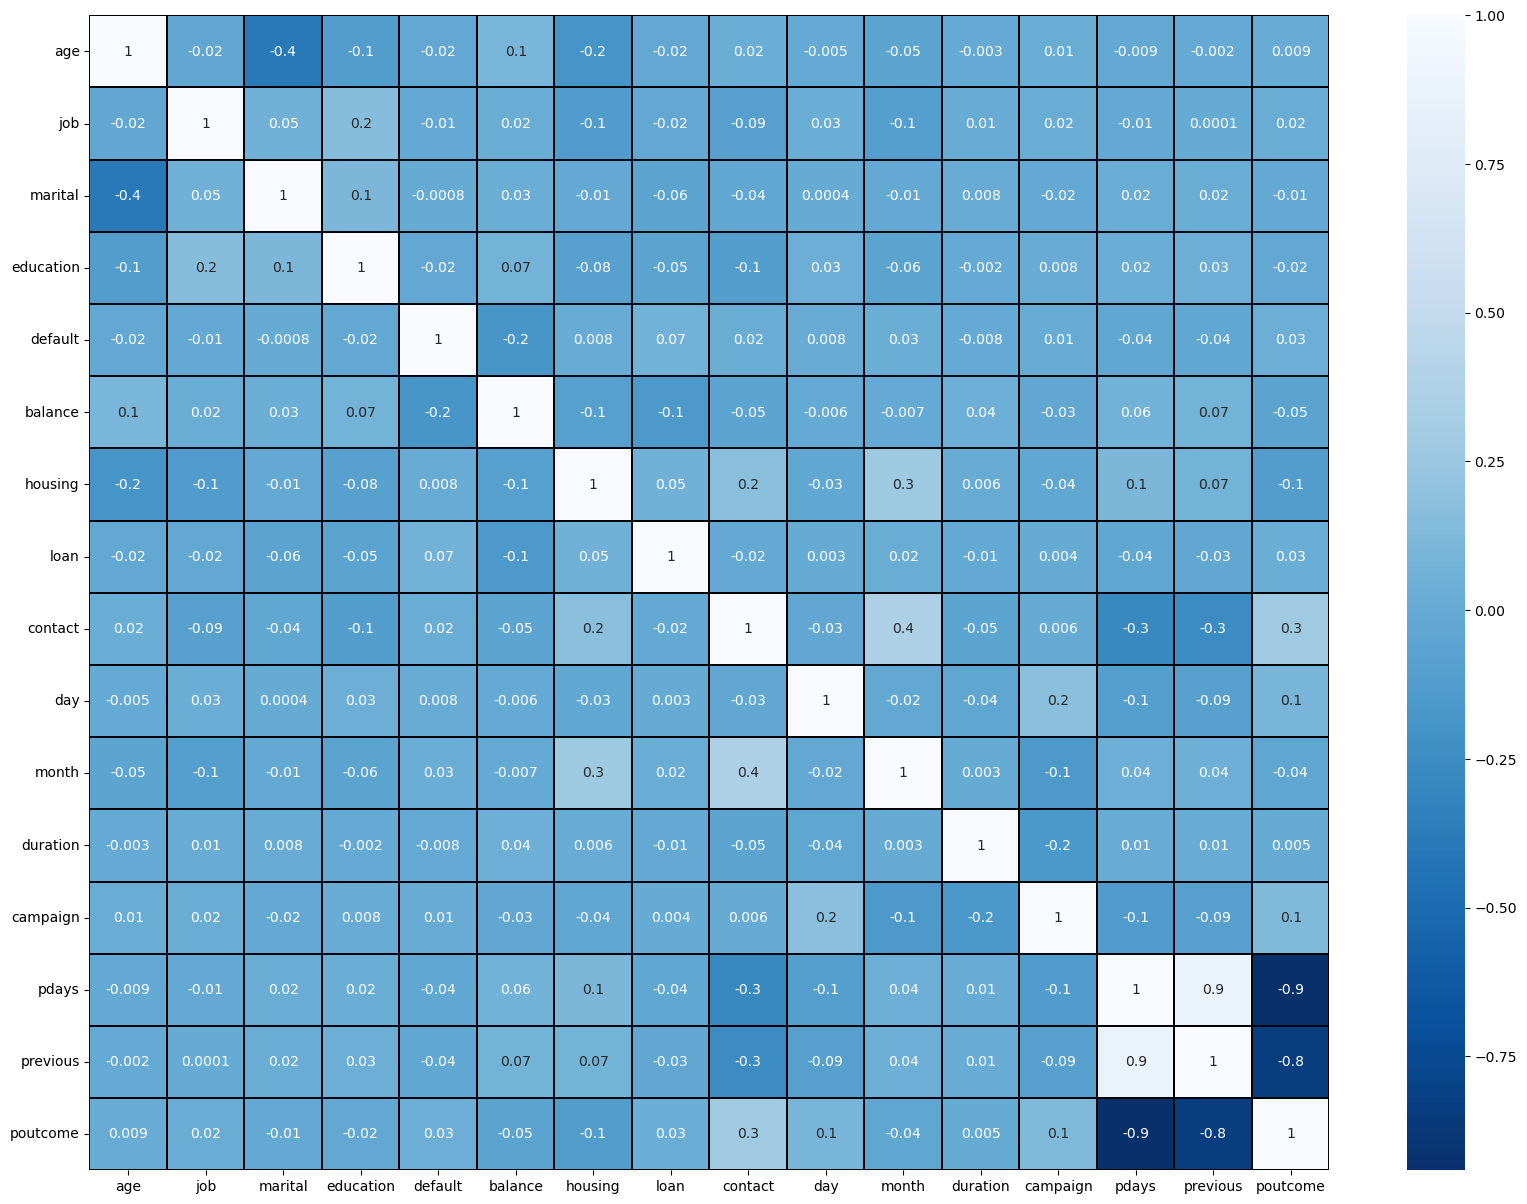

In [167]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),linewidths=0.1,fmt='.1g',linecolor='black',annot=True,cmap='Blues_r')
plt.yticks(rotation=0)
plt.show()
                   

In [168]:
x=df

Feature scaling using StandardScaler method.

In [169]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [170]:
x

age       job   marital  education  default   balance   housing  \
0     -0.852960  0.806415 -0.278869  -0.302855      0.0 -0.411339  0.884547   
1     -0.951801  0.502443  1.359847   1.042176      0.0 -0.357613  0.884547   
2      1.618060  0.806415  1.359847  -1.647887      0.0  1.291409  0.884547   
3      0.431971 -1.017417 -1.917586  -0.302855      0.0 -2.614690 -1.130523   
4     -0.852960 -0.105501  1.359847   1.042176      0.0 -1.194182  0.884547   
...         ...       ...       ...        ...      ...       ...       ...   
12488 -0.161074 -0.105501 -0.278869   1.042176      0.0 -0.626483 -1.130523   
12489  1.321538 -1.017417 -0.278869  -1.647887      0.0  0.906801  0.884547   
12490 -0.556437  0.198471 -0.278869  -1.647887      0.0 -0.143844  0.884547   
12491 -1.149482 -1.321389  1.359847  -0.302855      0.0  0.041443 -1.130523   
12492 -1.149482 -1.321389 -0.278869  -0.302855      0.0 -0.993092  0.884547   

           loan   contact       day     month  duration  campaign     pdays  \
0     -0.426270 -0.710045 -0.077539  0.831309 -1.865950  1.793828 -0.443970   
1     -0.426270  1.507602  0.043775  0.831309  1.767479 -0.937725 -0.443970   
2     -0.426270  0.398779 -0.320166  0.831309 -1.082973 -0.068835 -0.443970   
3      2.345929  1.507602 -1.533303 -0.166757 -0.612357 -0.937725 -0.443970   
4     -0.426270 -0.710045  0.771657 -0.166757  1.117143 -0.068835 -0.443970   
...         ...       ...       ...       ...       ...       ...       ...   
12488 -0.426270 -0.710045  1.499540 -1.497511 -0.322450  1.025898 -0.443970   
12489 -0.426270  1.507602  0.529030  0.165932 -0.252594 -0.937725 -0.443970   
12490 -0.426270 -0.710045  1.620853 -0.499446 -0.410565 -0.937725 -0.443970   
12491 -0.426270 -0.710045 -0.805421  1.163997  0.058409 -0.068835  1.645016   
12492 -0.426270 -0.710045 -1.169362  0.831309  0.686375 -0.937725  2.643924   

       previous  poutcome  
0     -0.430662  0.426902  
1     -0.430662  0.426902  
2     -0.430662  0.426902  
3     -0.430662  0.426902  
4     -0.430662  0.426902  
...         ...       ...  
12488 -0.430662  0.426902  
12489 -0.430662  0.426902  
12490 -0.430662  0.426902  
12491  2.686351 -0.599124  
12492  1.368946 -2.651176  

[12493 rows x 16 columns]

In [171]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns
vif

vif values   features
0     1.273318        age
1     1.047664        job
2     1.219030    marital
3     1.065070  education
4          NaN    default
5     1.046200    balance
6     1.187307    housing
7     1.030204       loan
8     1.328605    contact
9     1.032054        day
10    1.271385      month
11    1.022273   duration
12    1.066887   campaign
13   14.749042      pdays
14    8.261876   previous
15    9.595463   poutcome

As we can see there is multicorrelation present in the dataset.here pdays has highly correlated and VIF value here is high so we can Drop this column.

In [172]:
x.drop('pdays',axis=1,inplace=True)

In [173]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns
vif

vif values   features
0     1.273298        age
1     1.047576        job
2     1.218649    marital
3     1.064726  education
4          NaN    default
5     1.046167    balance
6     1.185602    housing
7     1.029457       loan
8     1.324509    contact
9     1.030585        day
10    1.271315      month
11    1.021637   duration
12    1.066578   campaign
13    5.307789   previous
14    5.370493   poutcome

so after dropping pdays now we have solved multicolinearity issue.

Now we can load the data

In [174]:
import joblib
model=joblib.load('Banksubsriber.pkl')
prediction=model.predict(x)
prediction

array([0., 0., 0., ..., 0., 1., 0.])